ModuleNotFoundError: No module named 'ultralytics'

In [9]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython.display import clear_output

In [10]:
# Clear previous outputs
clear_output()

In [16]:
# Run YOLO with specified mode
from ultralytics import checks
checks()

Ultralytics 8.3.57 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.7/107.7 GB disk)


In [17]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="BLRRUb9V8ldKKwS0V9Ne")
project = rf.workspace("objectdetectionmodel-s20cq").project("cup_dataset")
version = project.version(1)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.3 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Cup_dataset-1 in yolov8:: 100%|██████████| 40/40 [00:00<00:00, 3529.30it/s]


In [21]:
!yolo task=detect mode=train model=yolov8m.pt data=/content/Cup_dataset-1/data.yaml epochs=20 imgsz=640

Ultralytics 8.3.57 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Cup_dataset-1/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_b

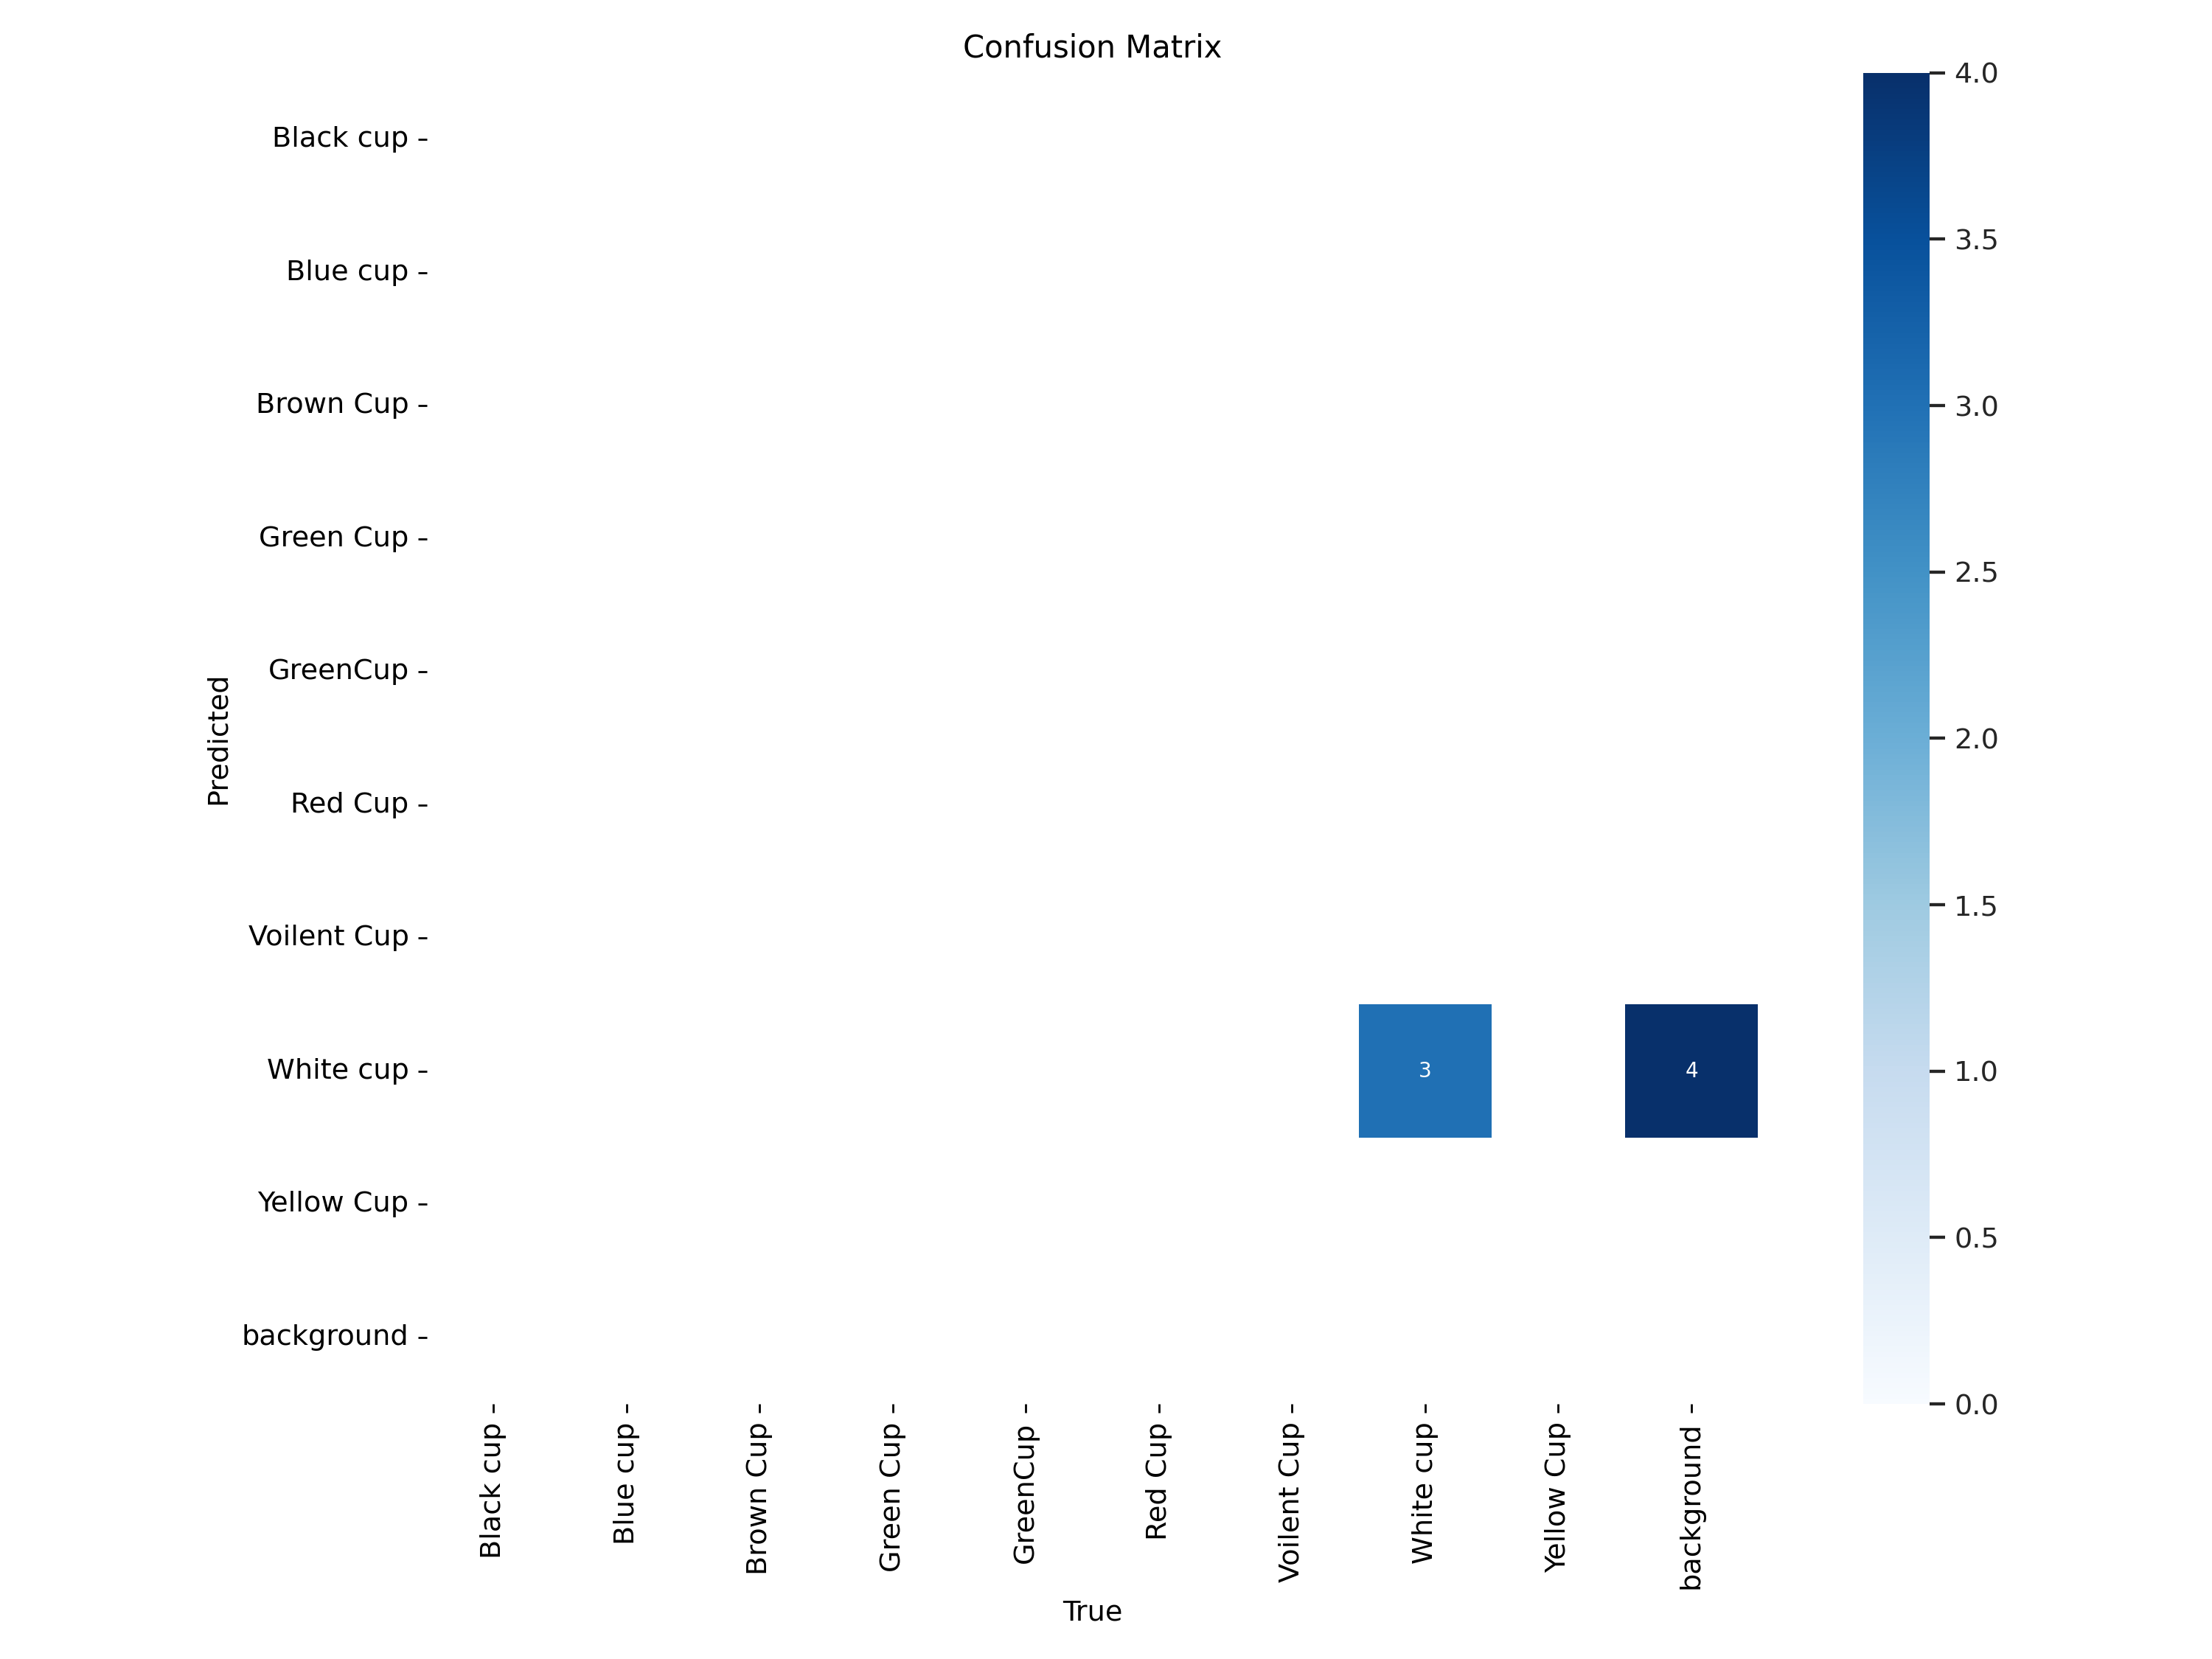

In [24]:
Image(filename=f'/content/runs/detect/train4/confusion_matrix.png', width=600)

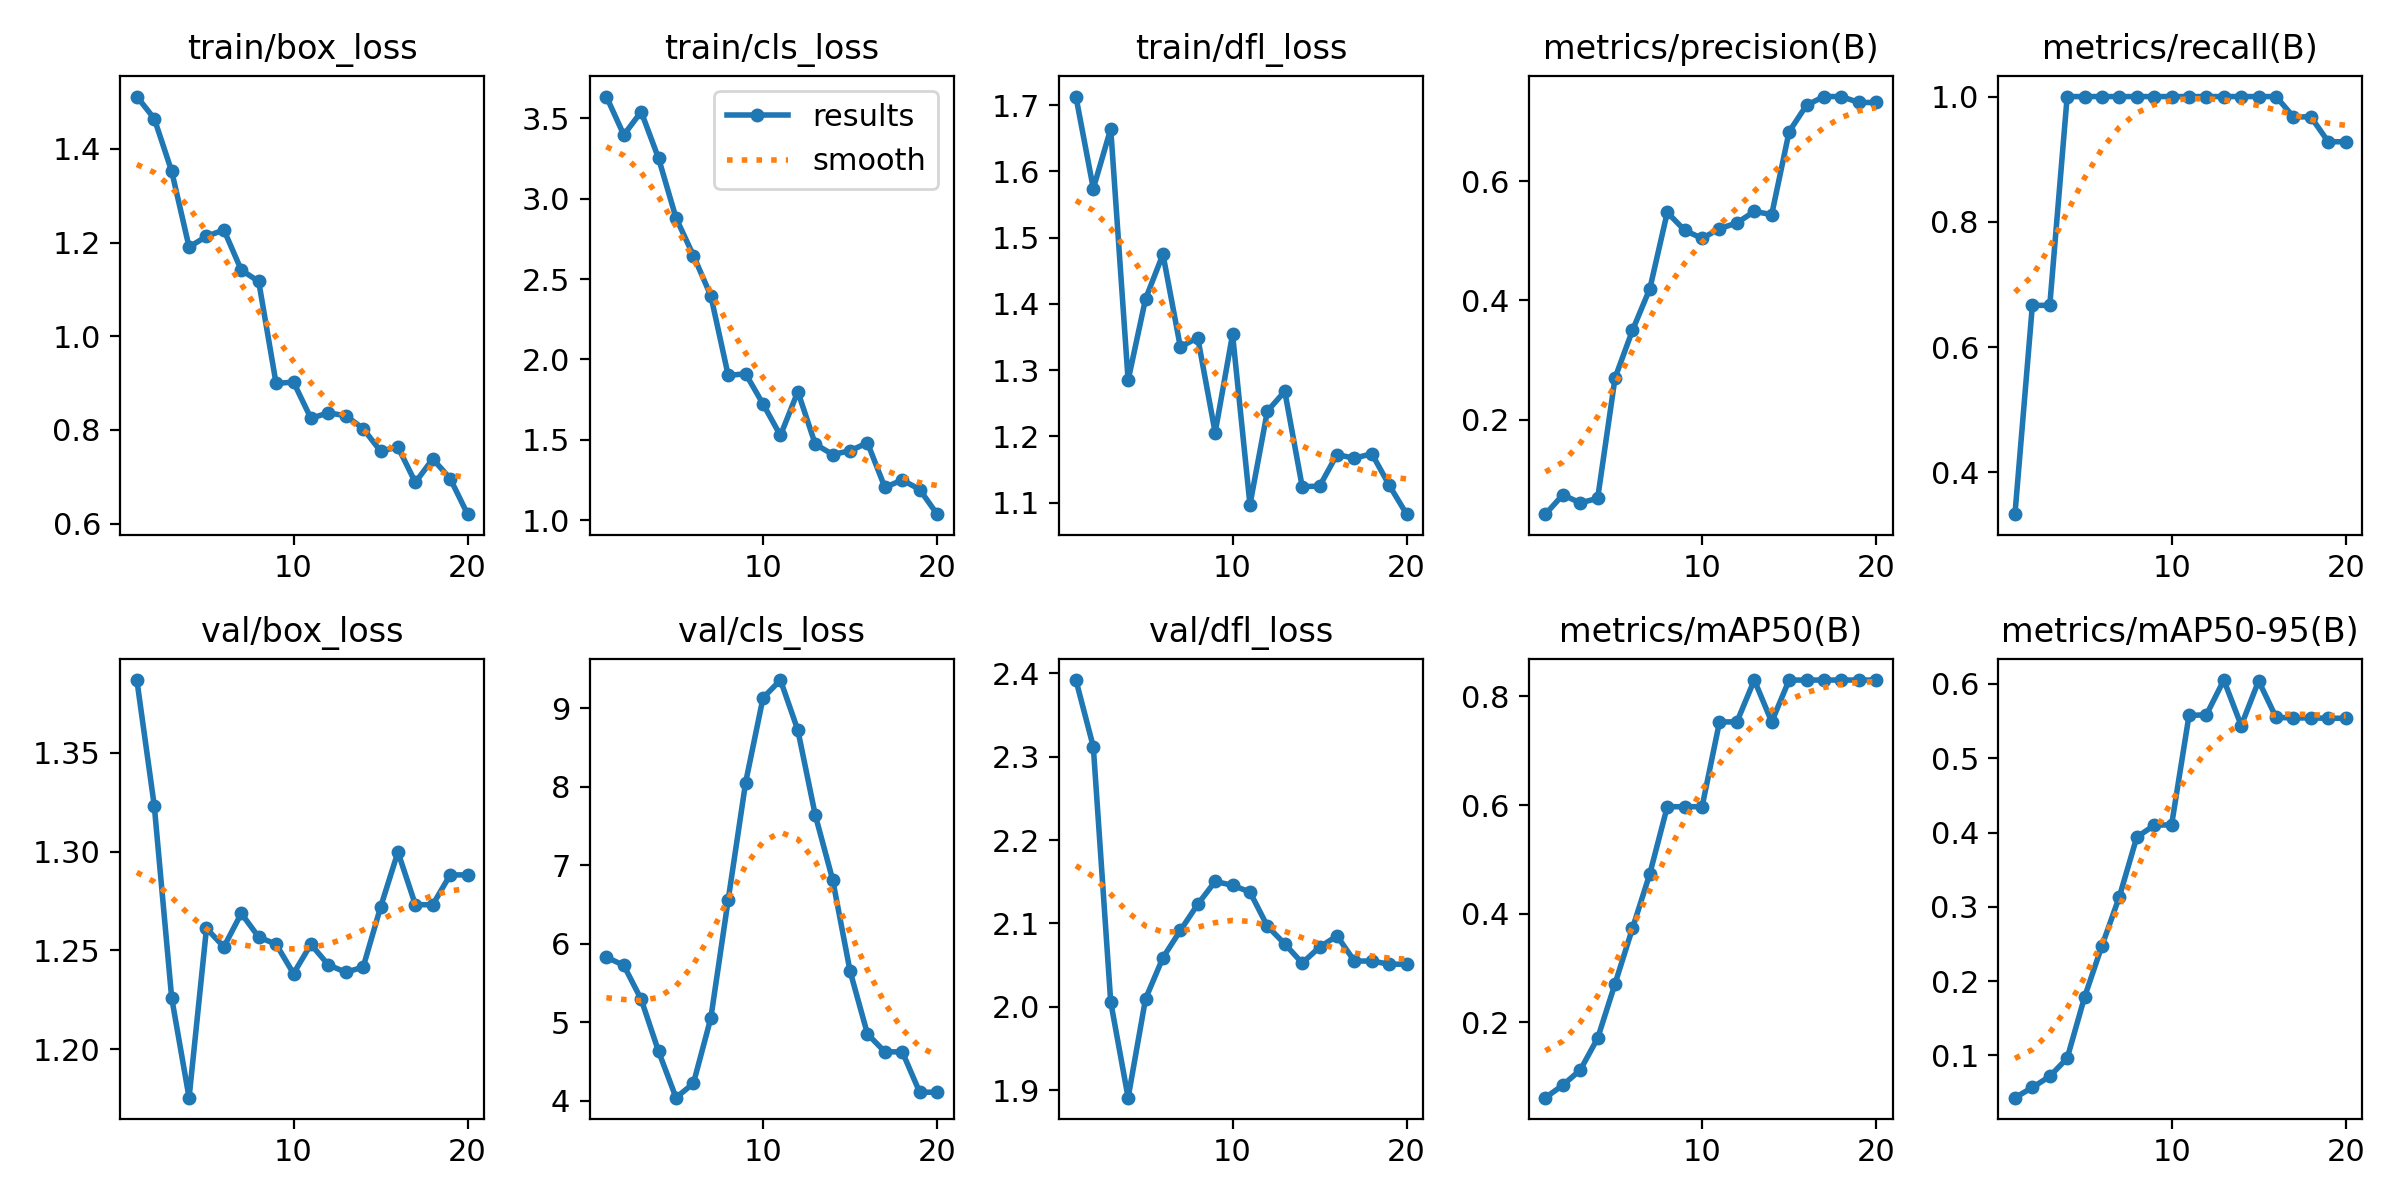

In [26]:
Image(filename=f'/content/runs/detect/train4/results.png', width=600)

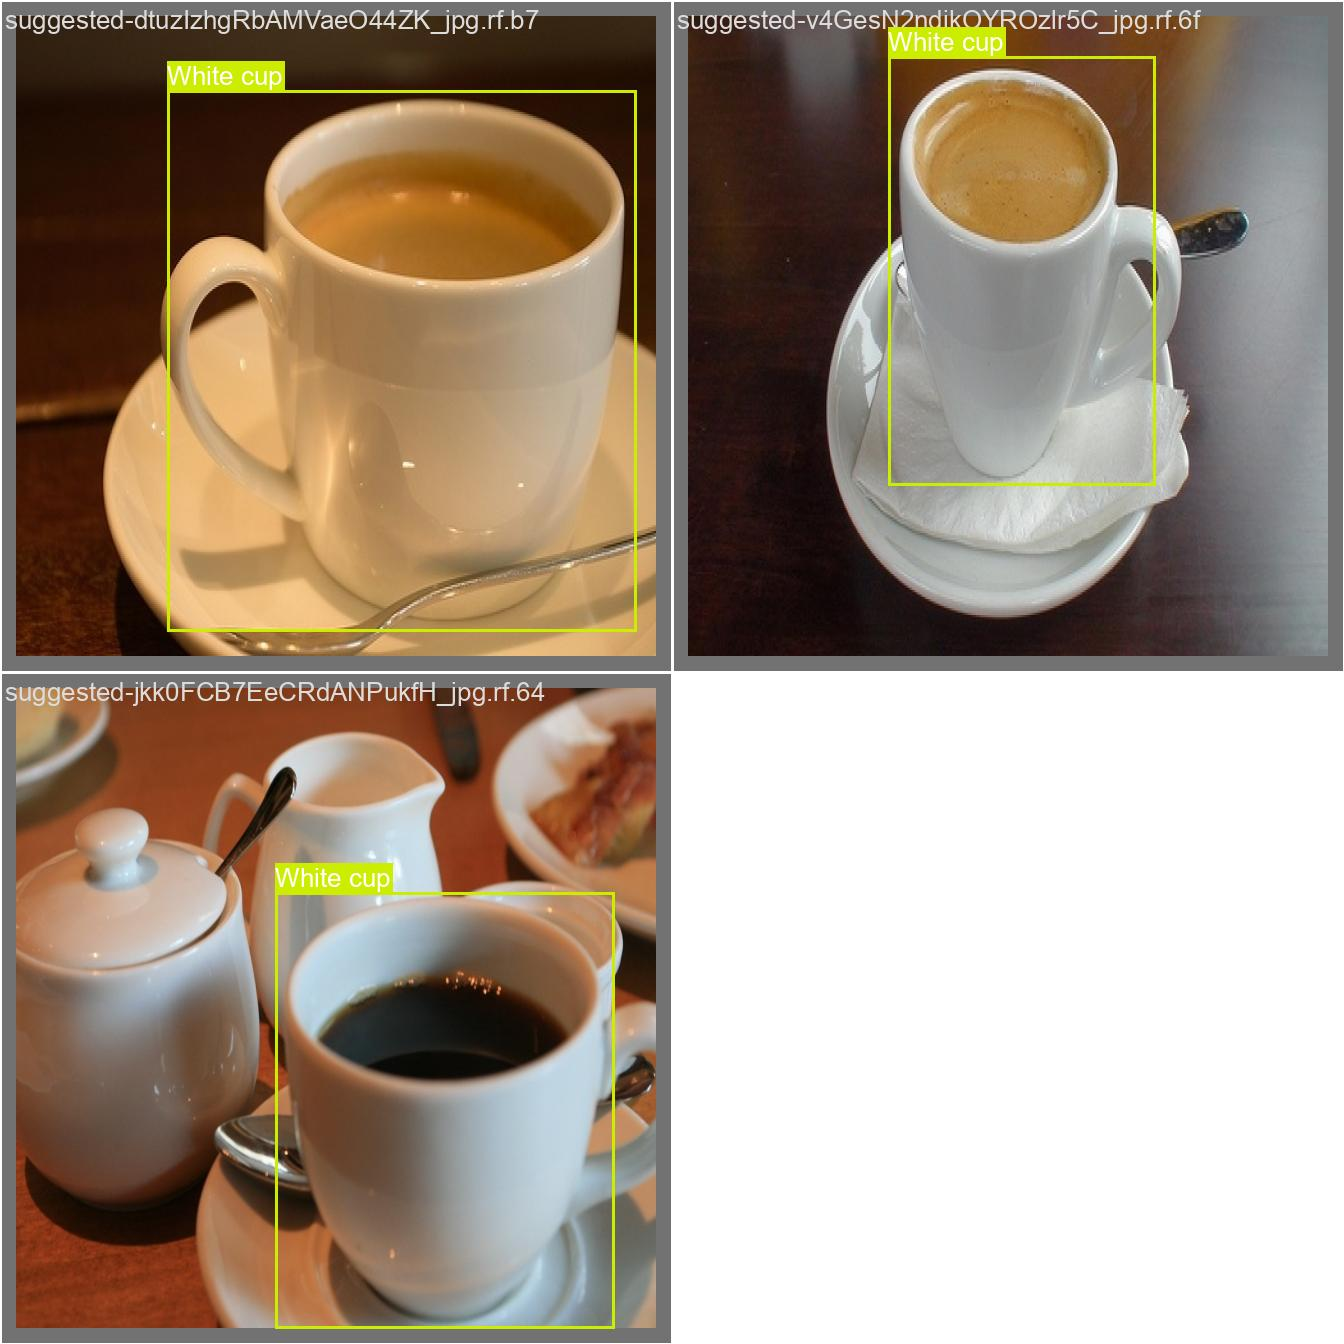

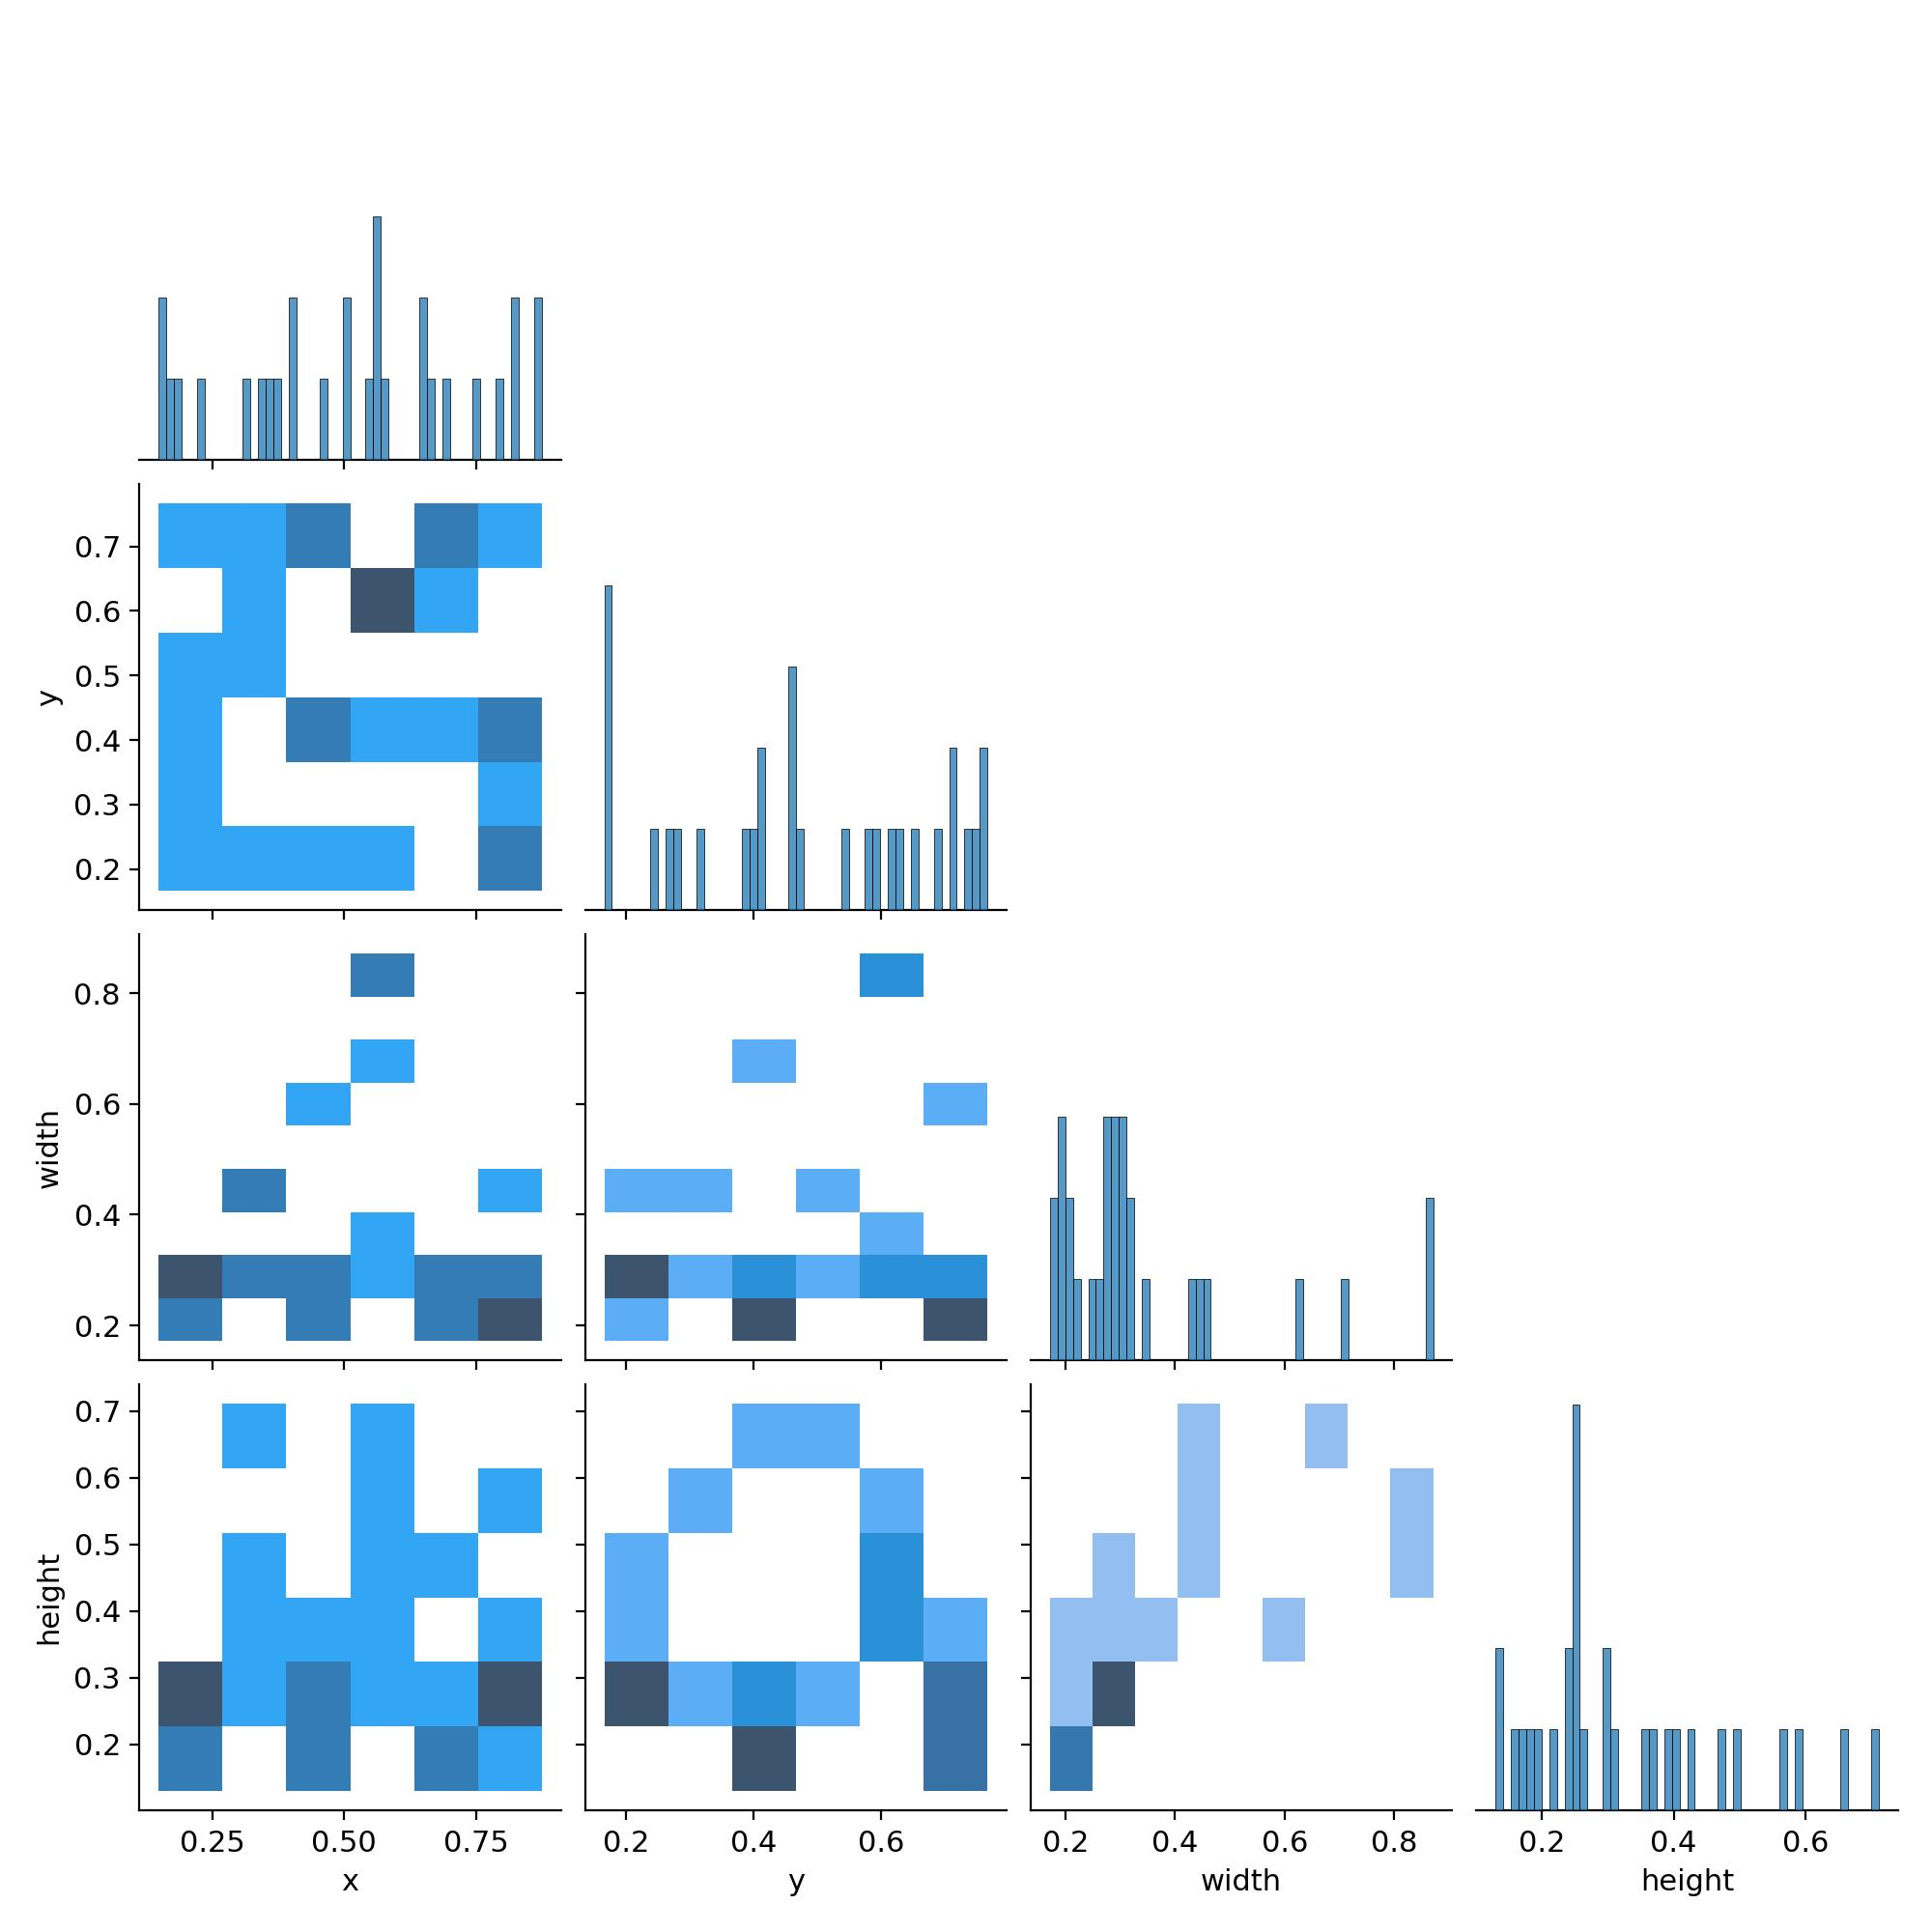

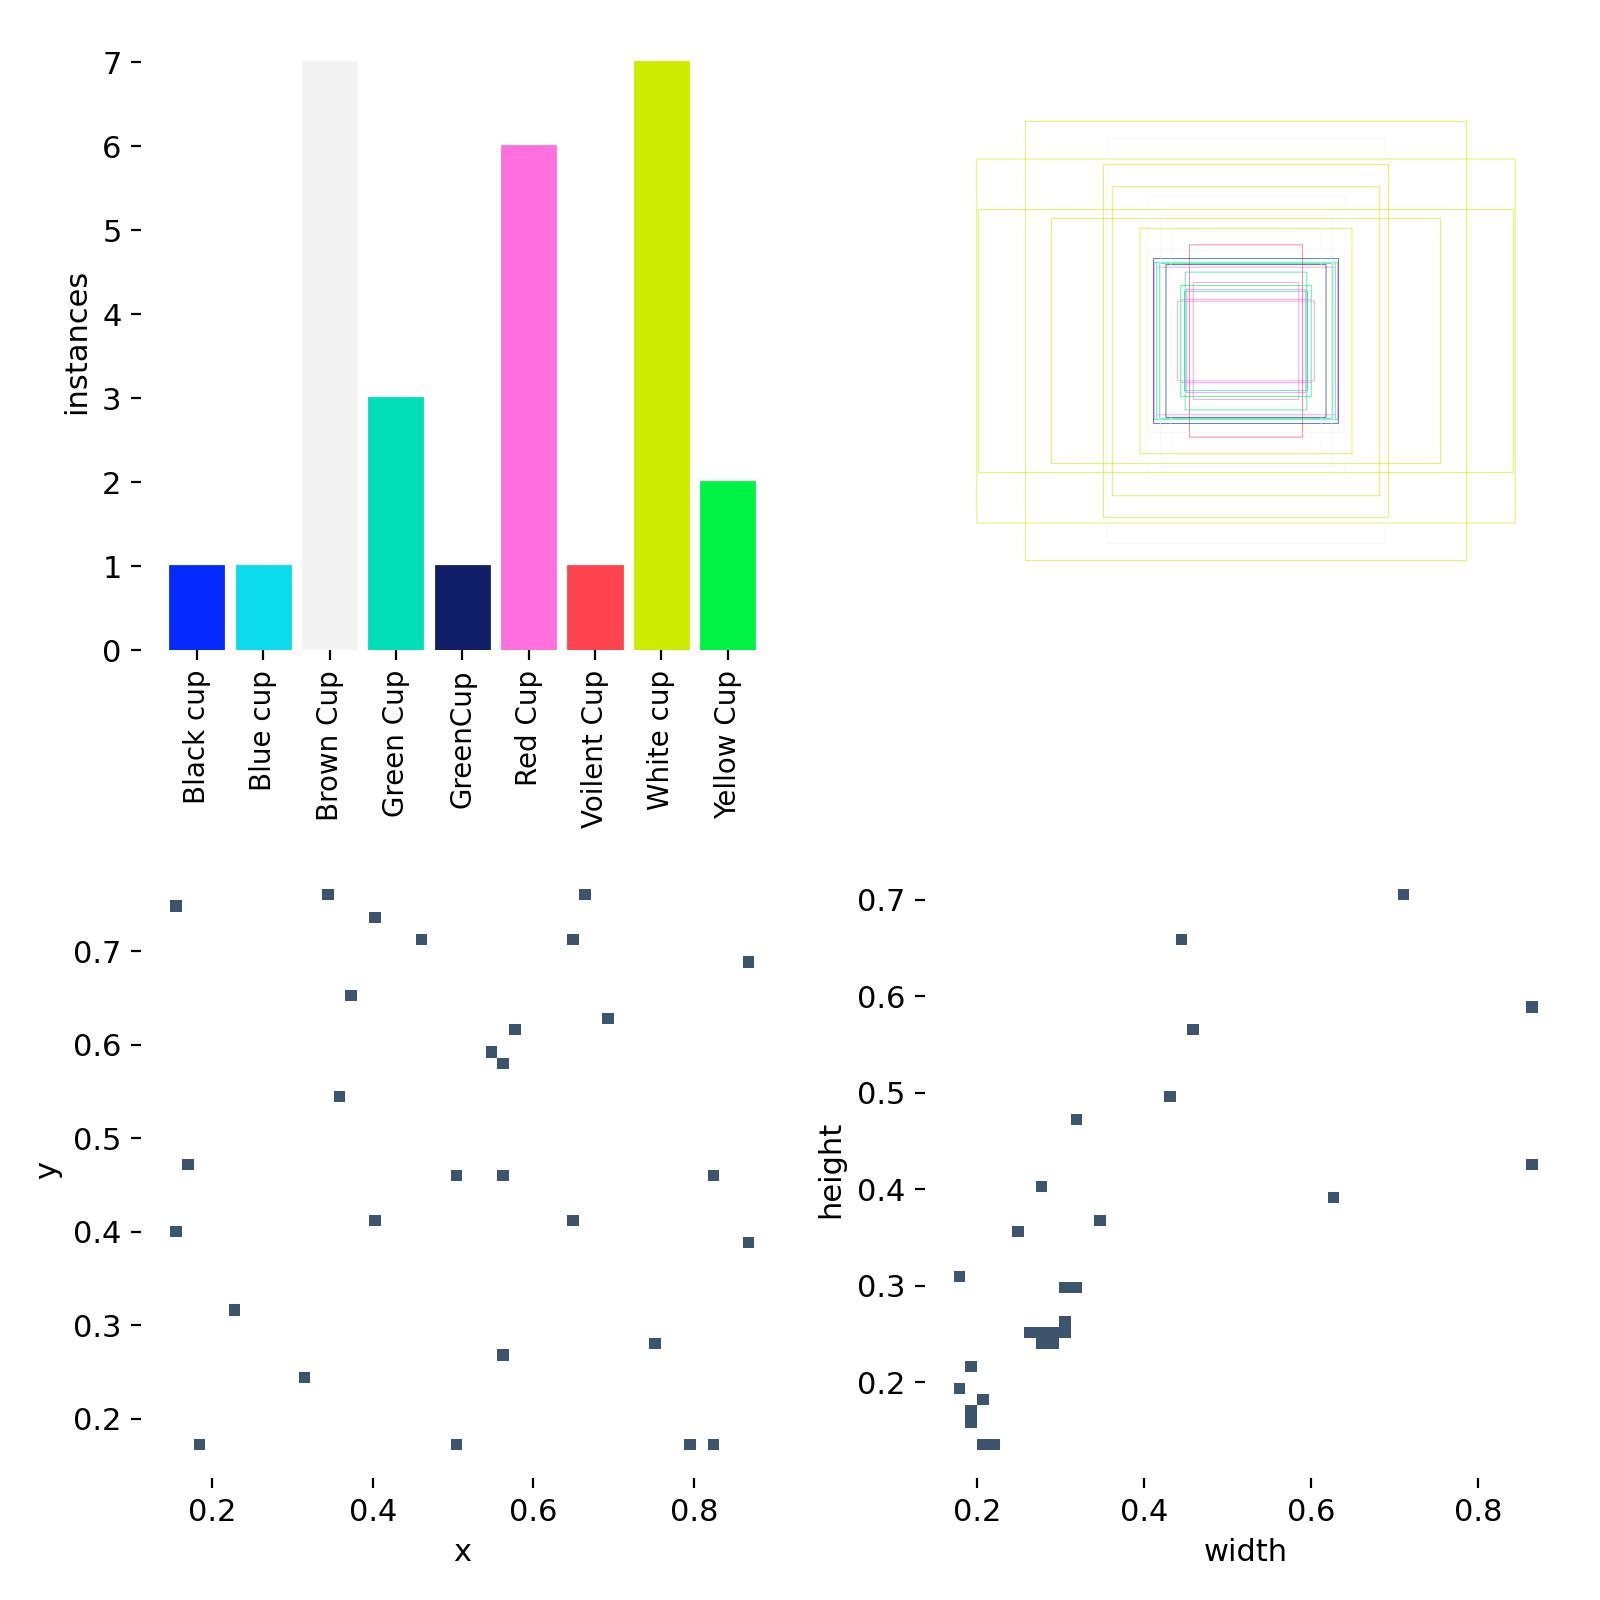

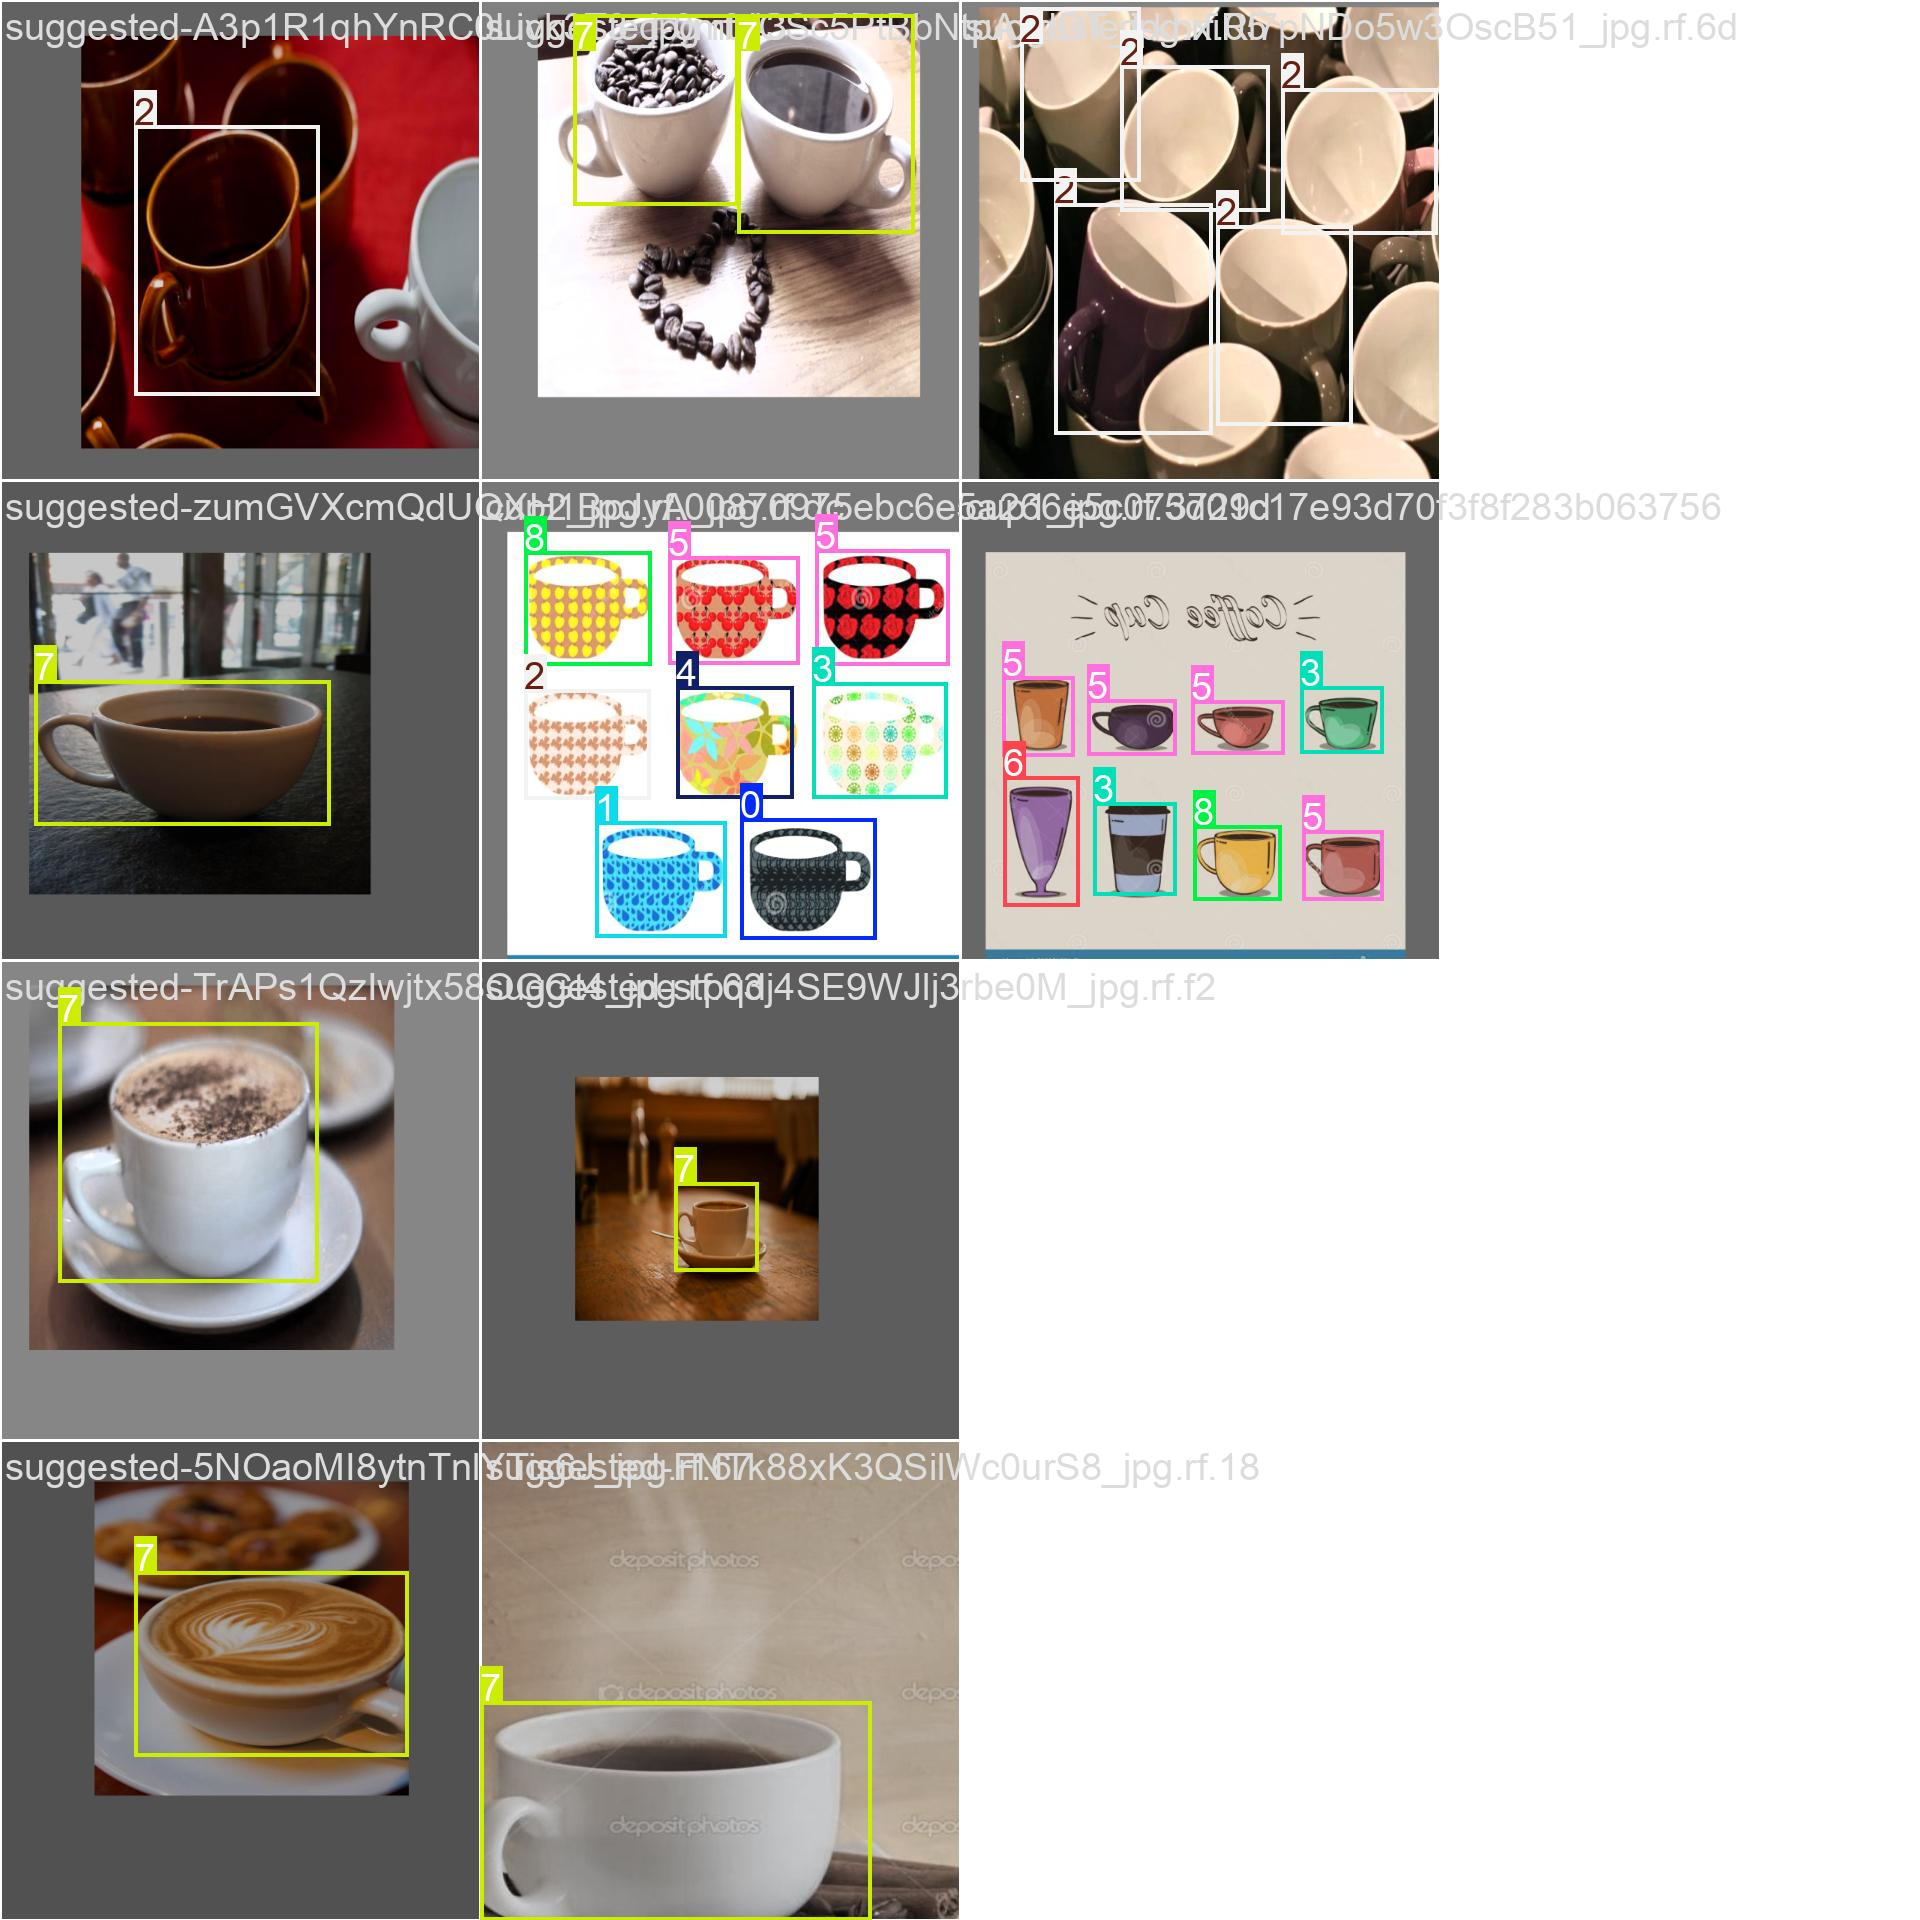

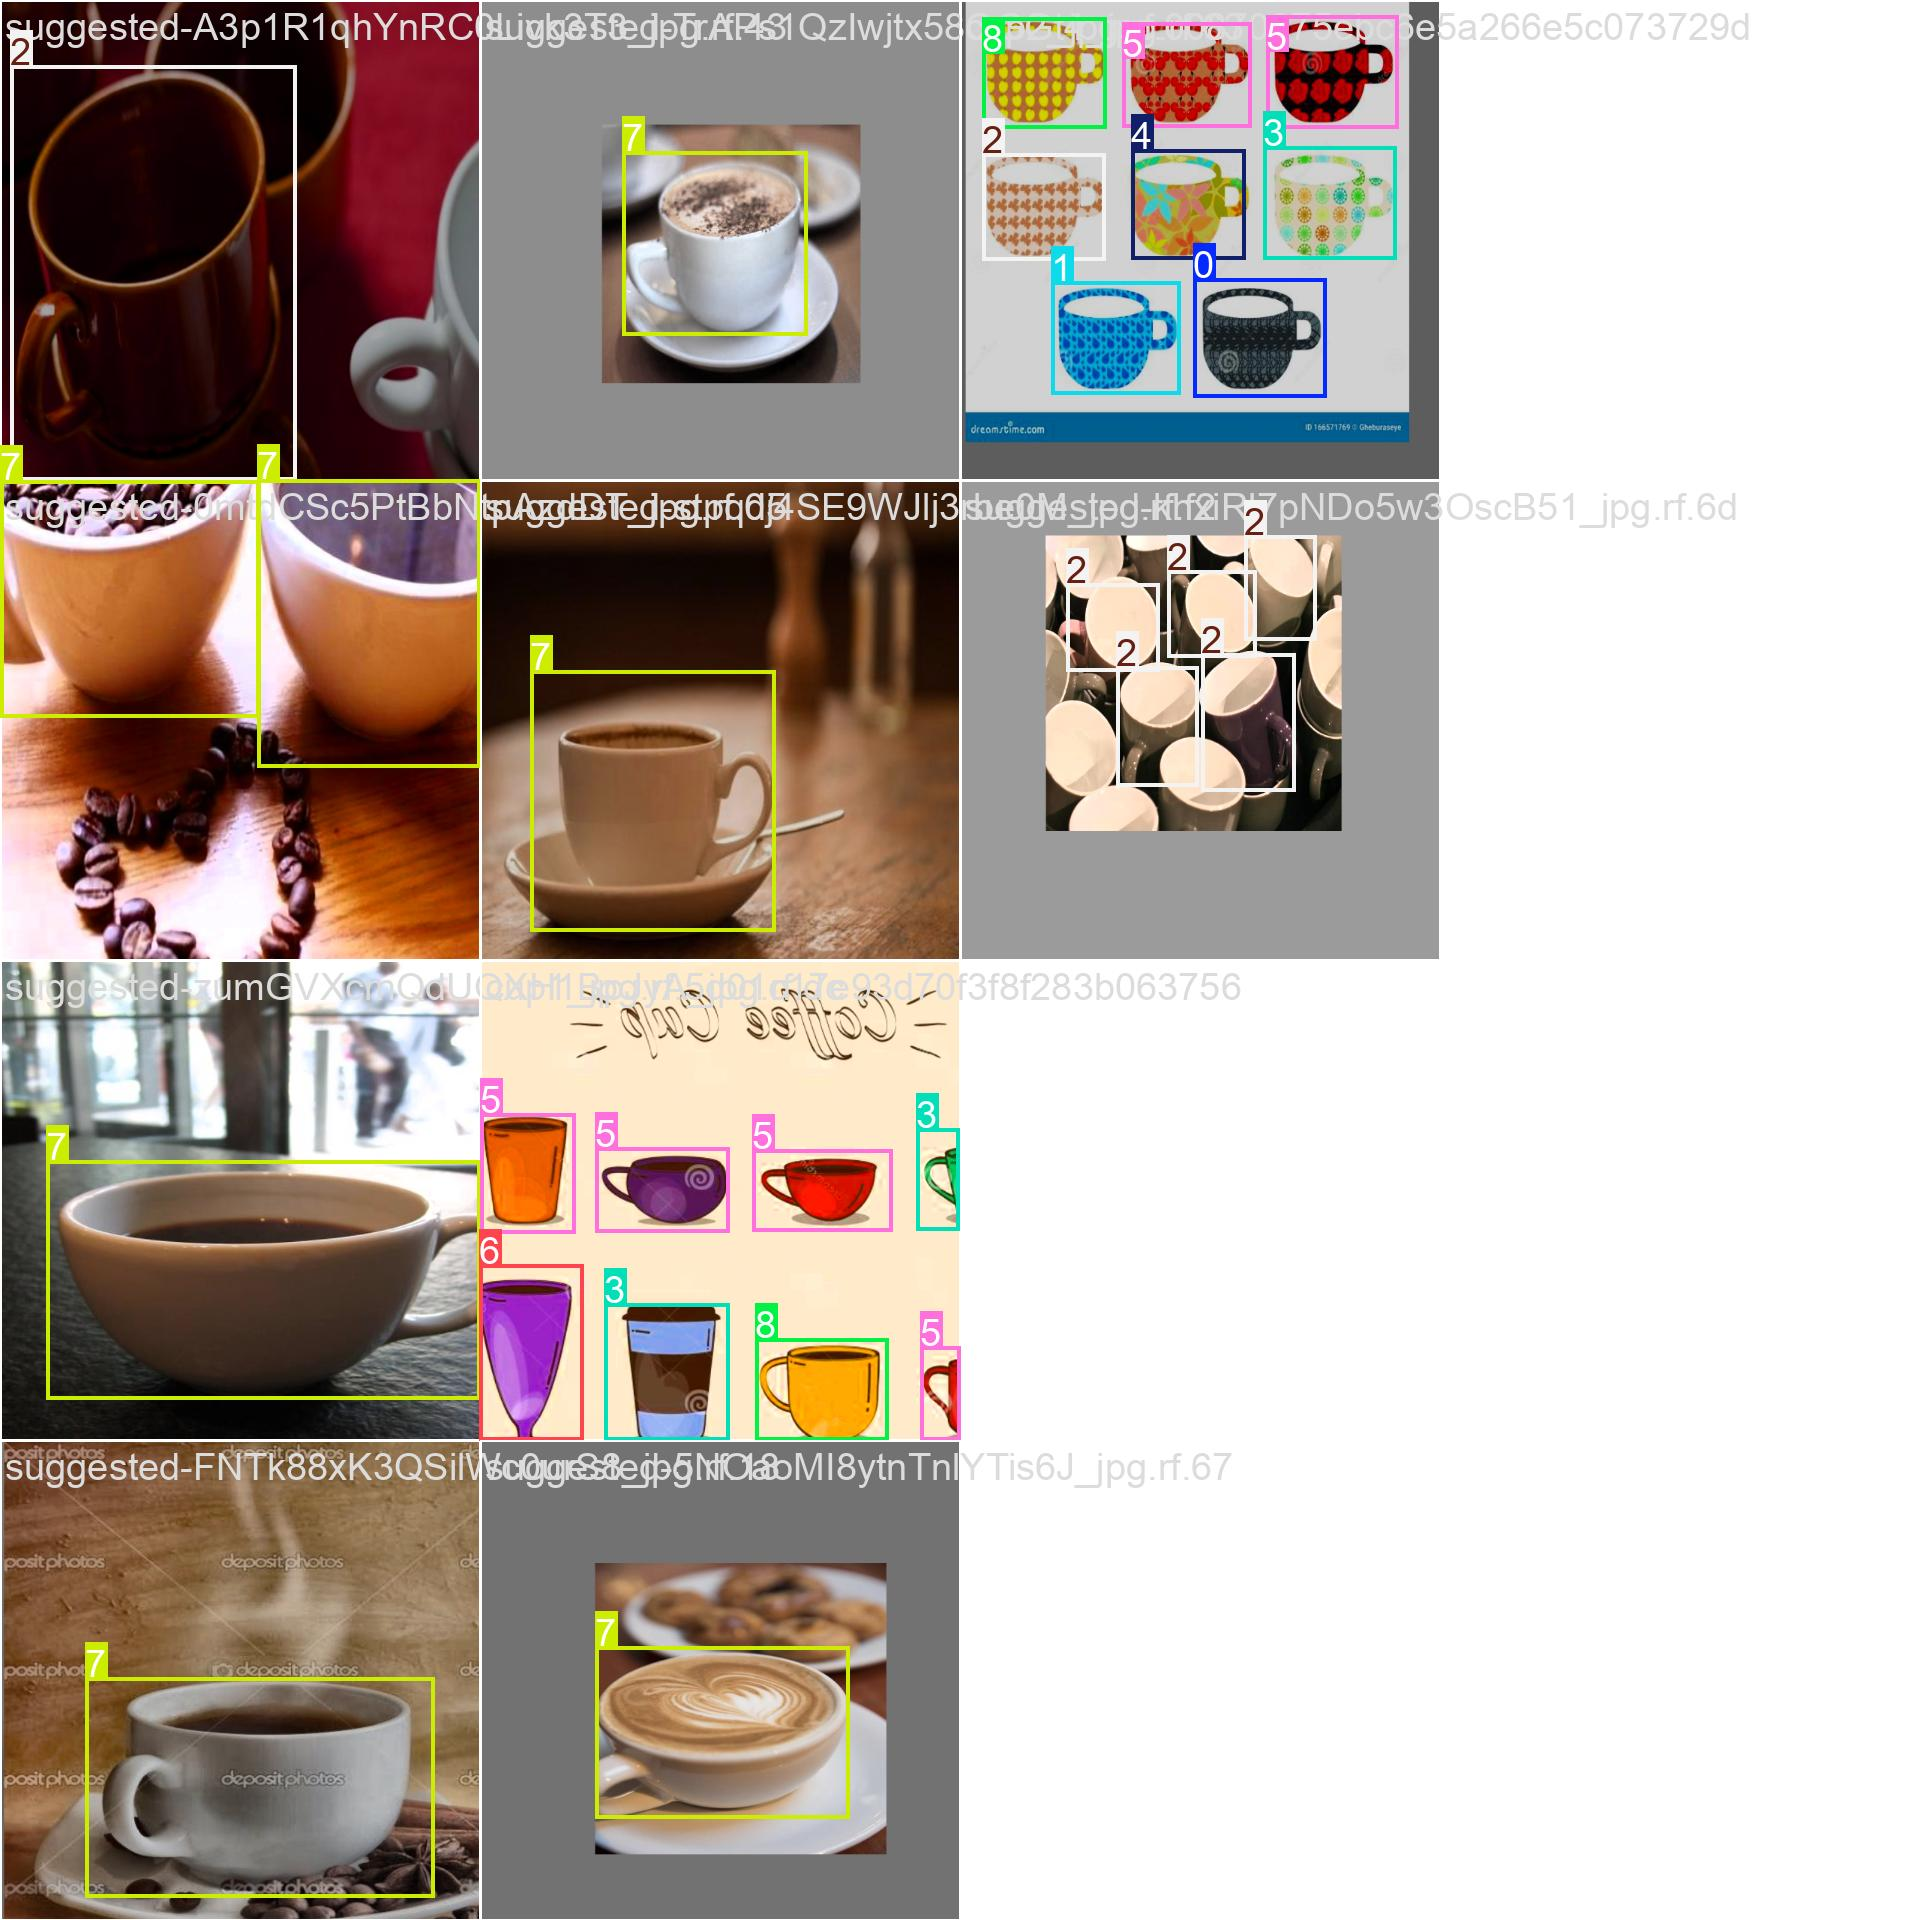

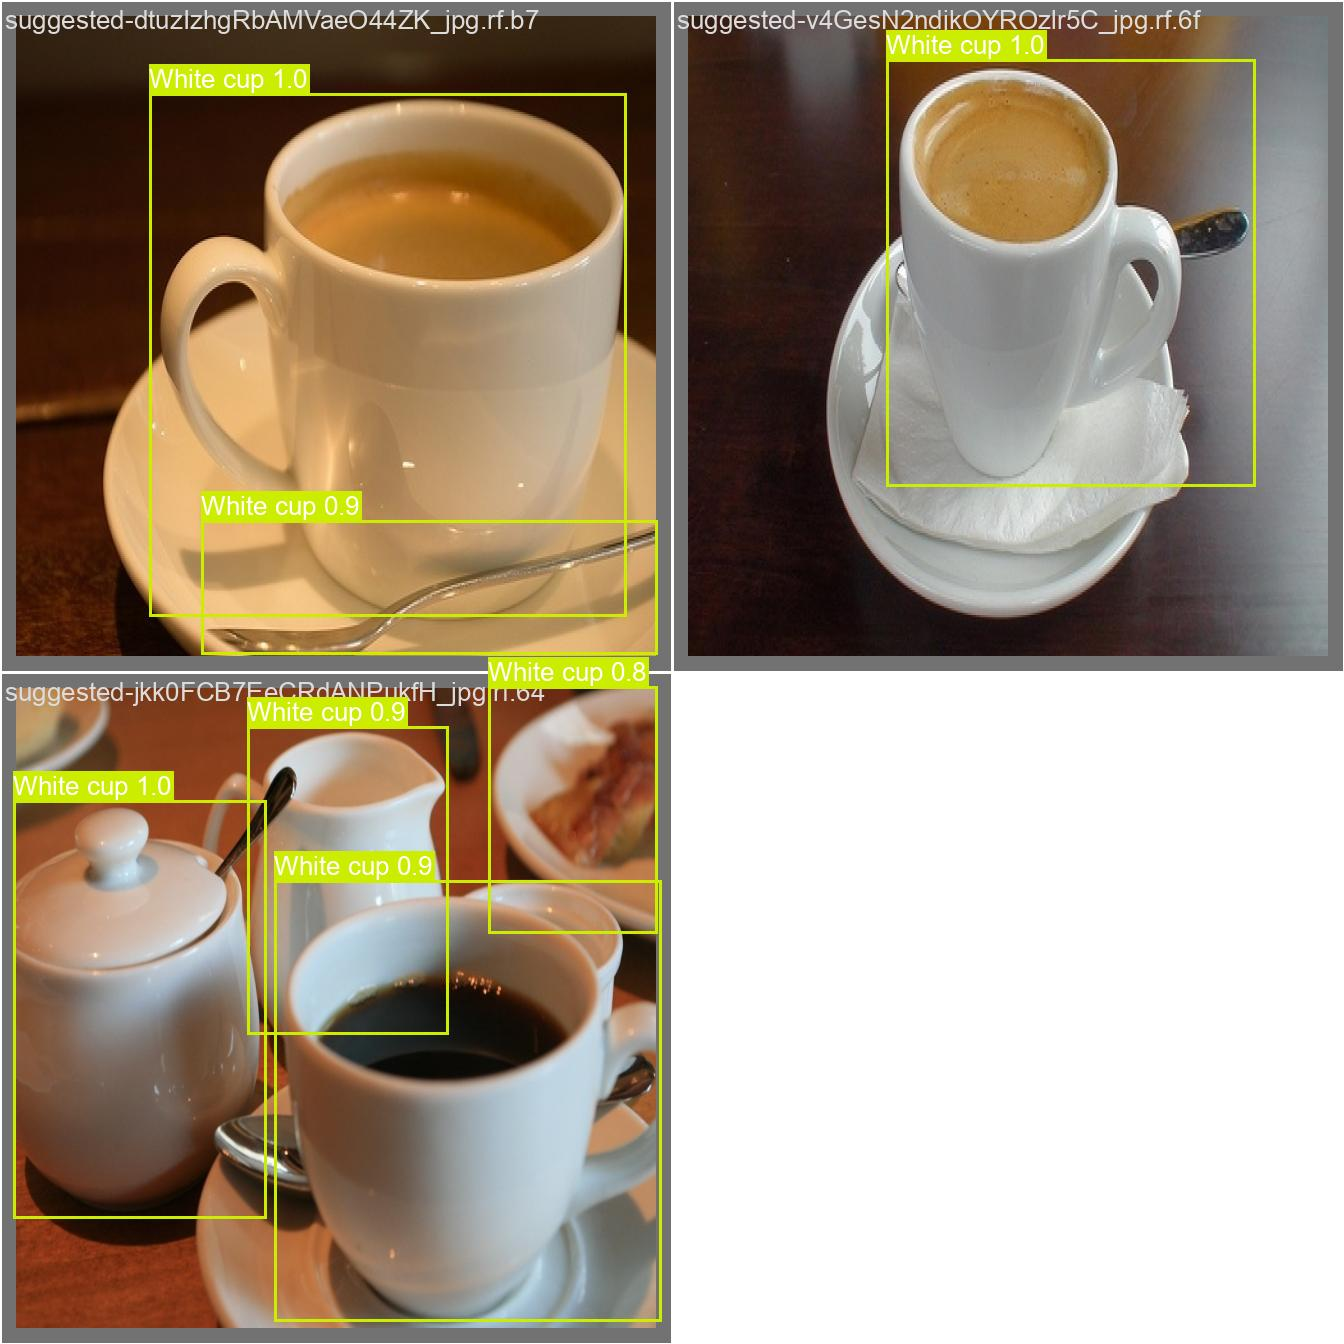

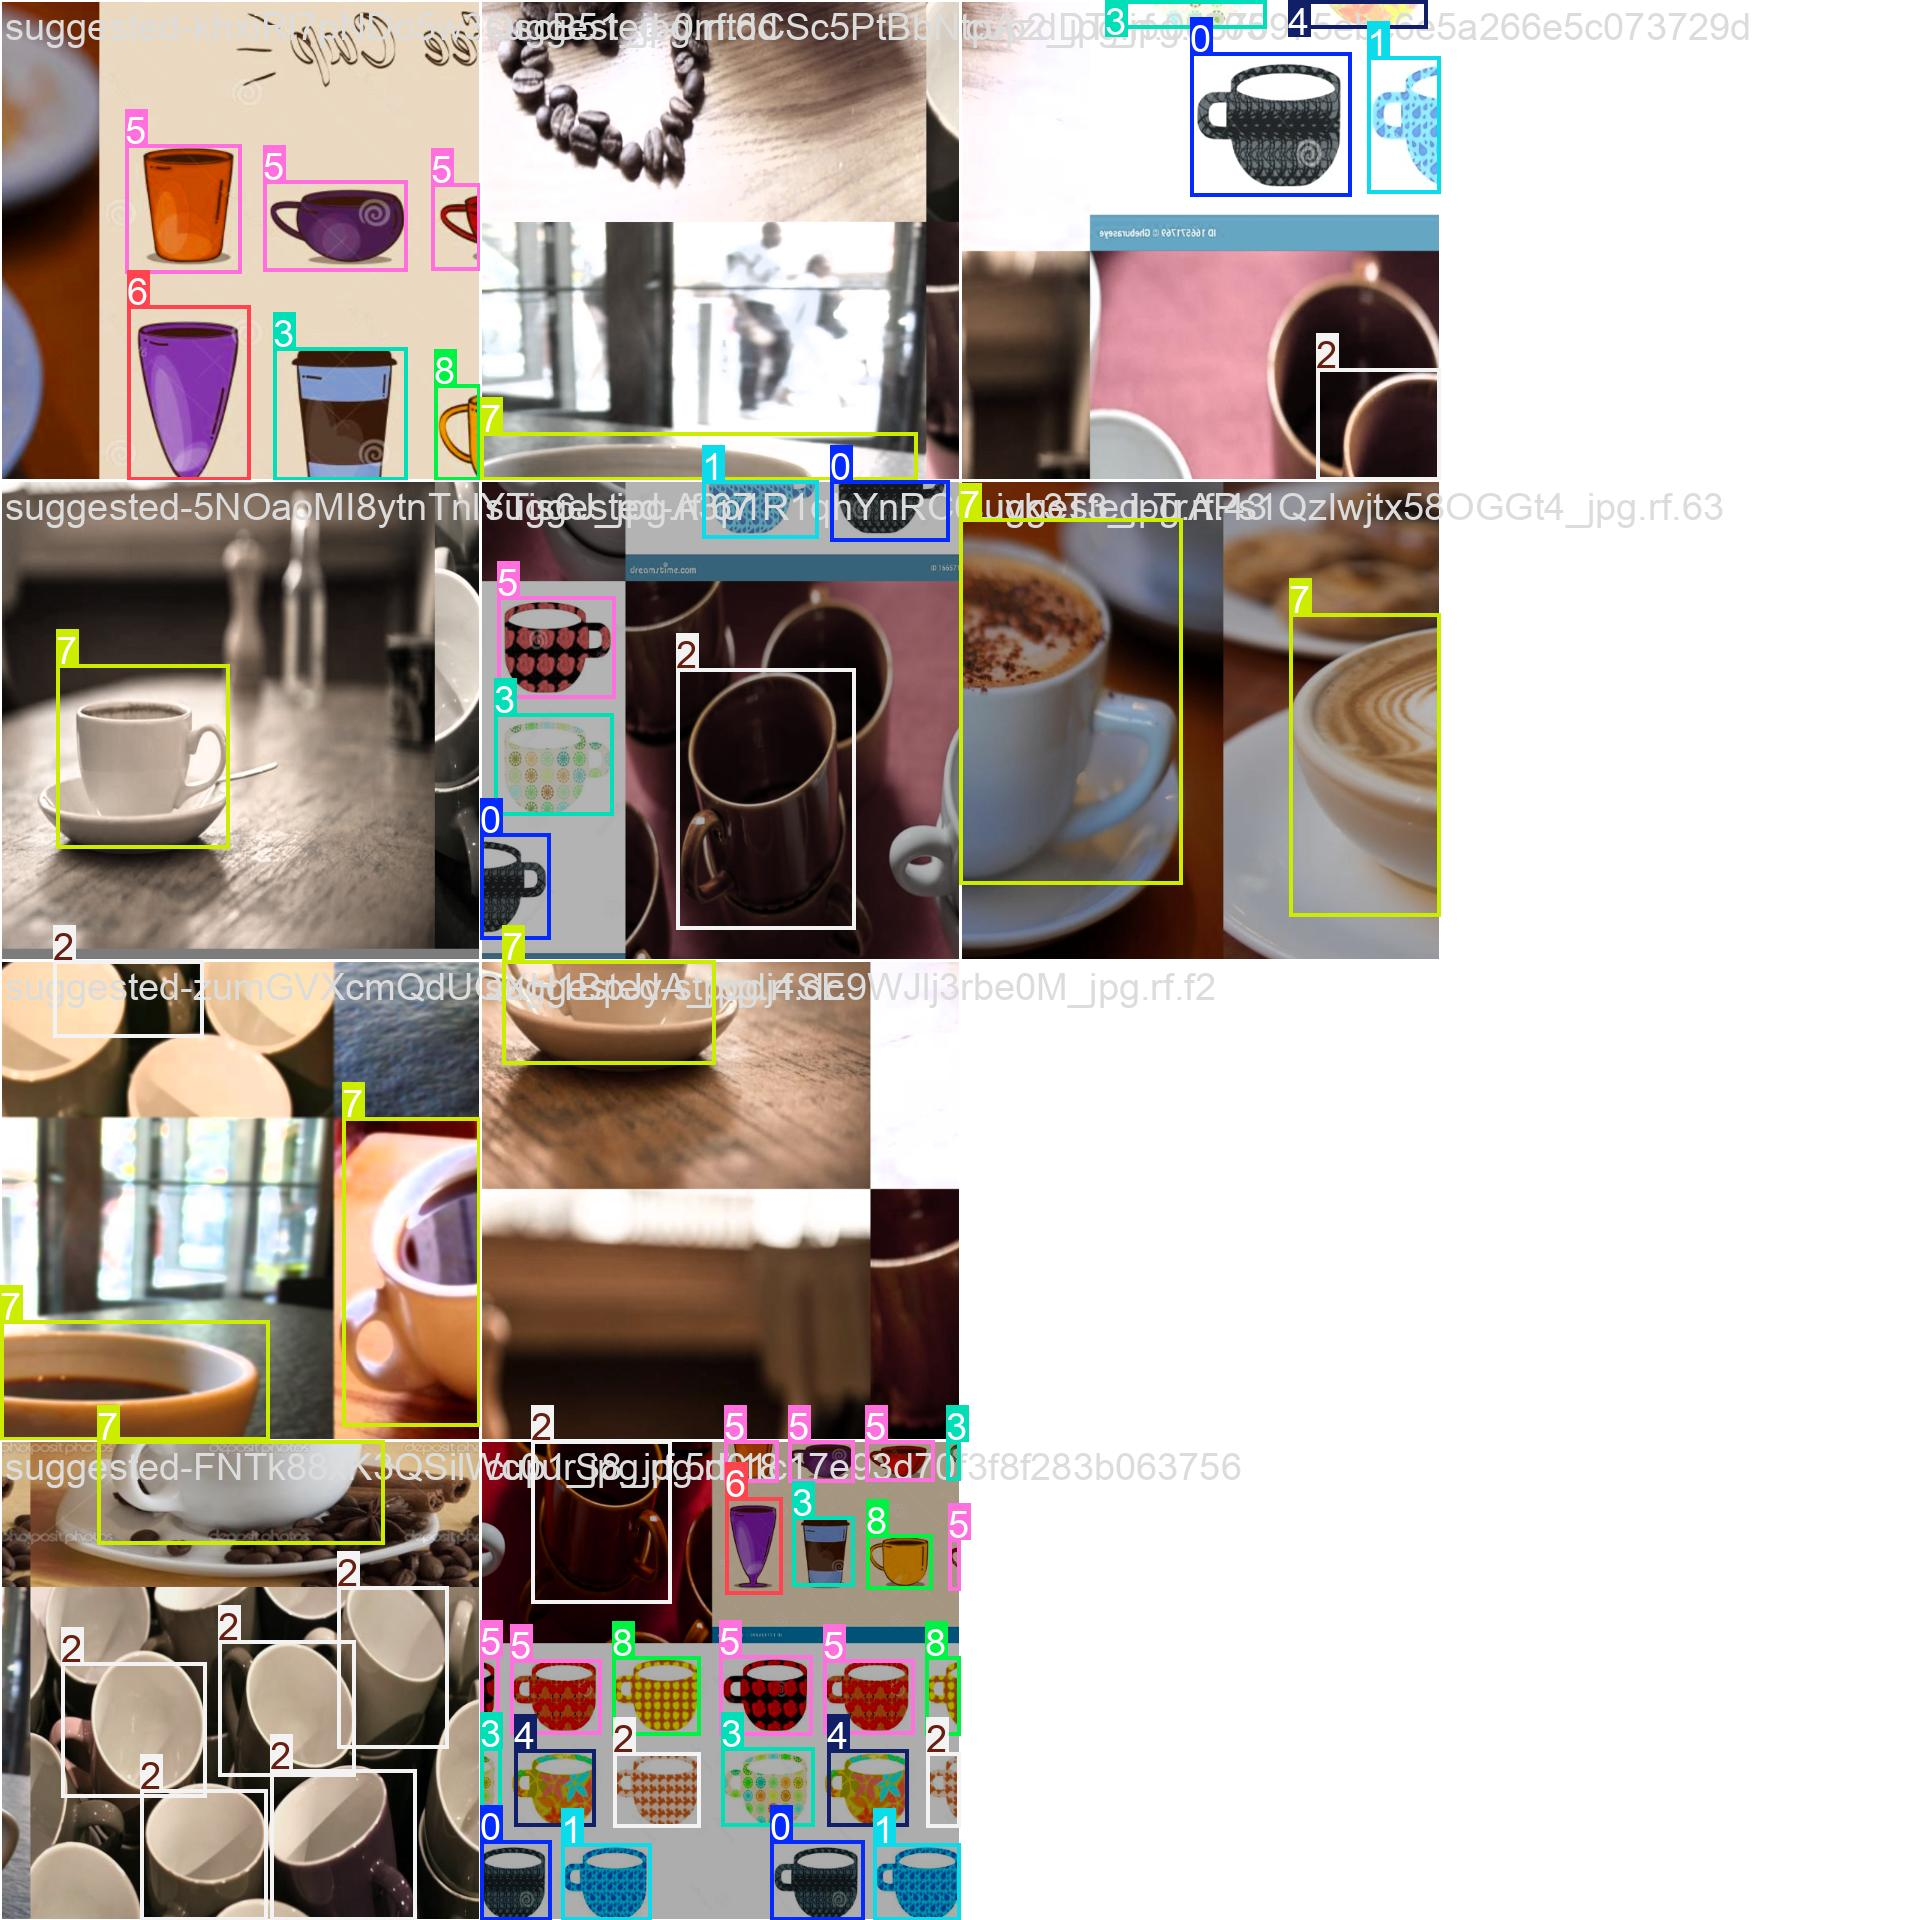

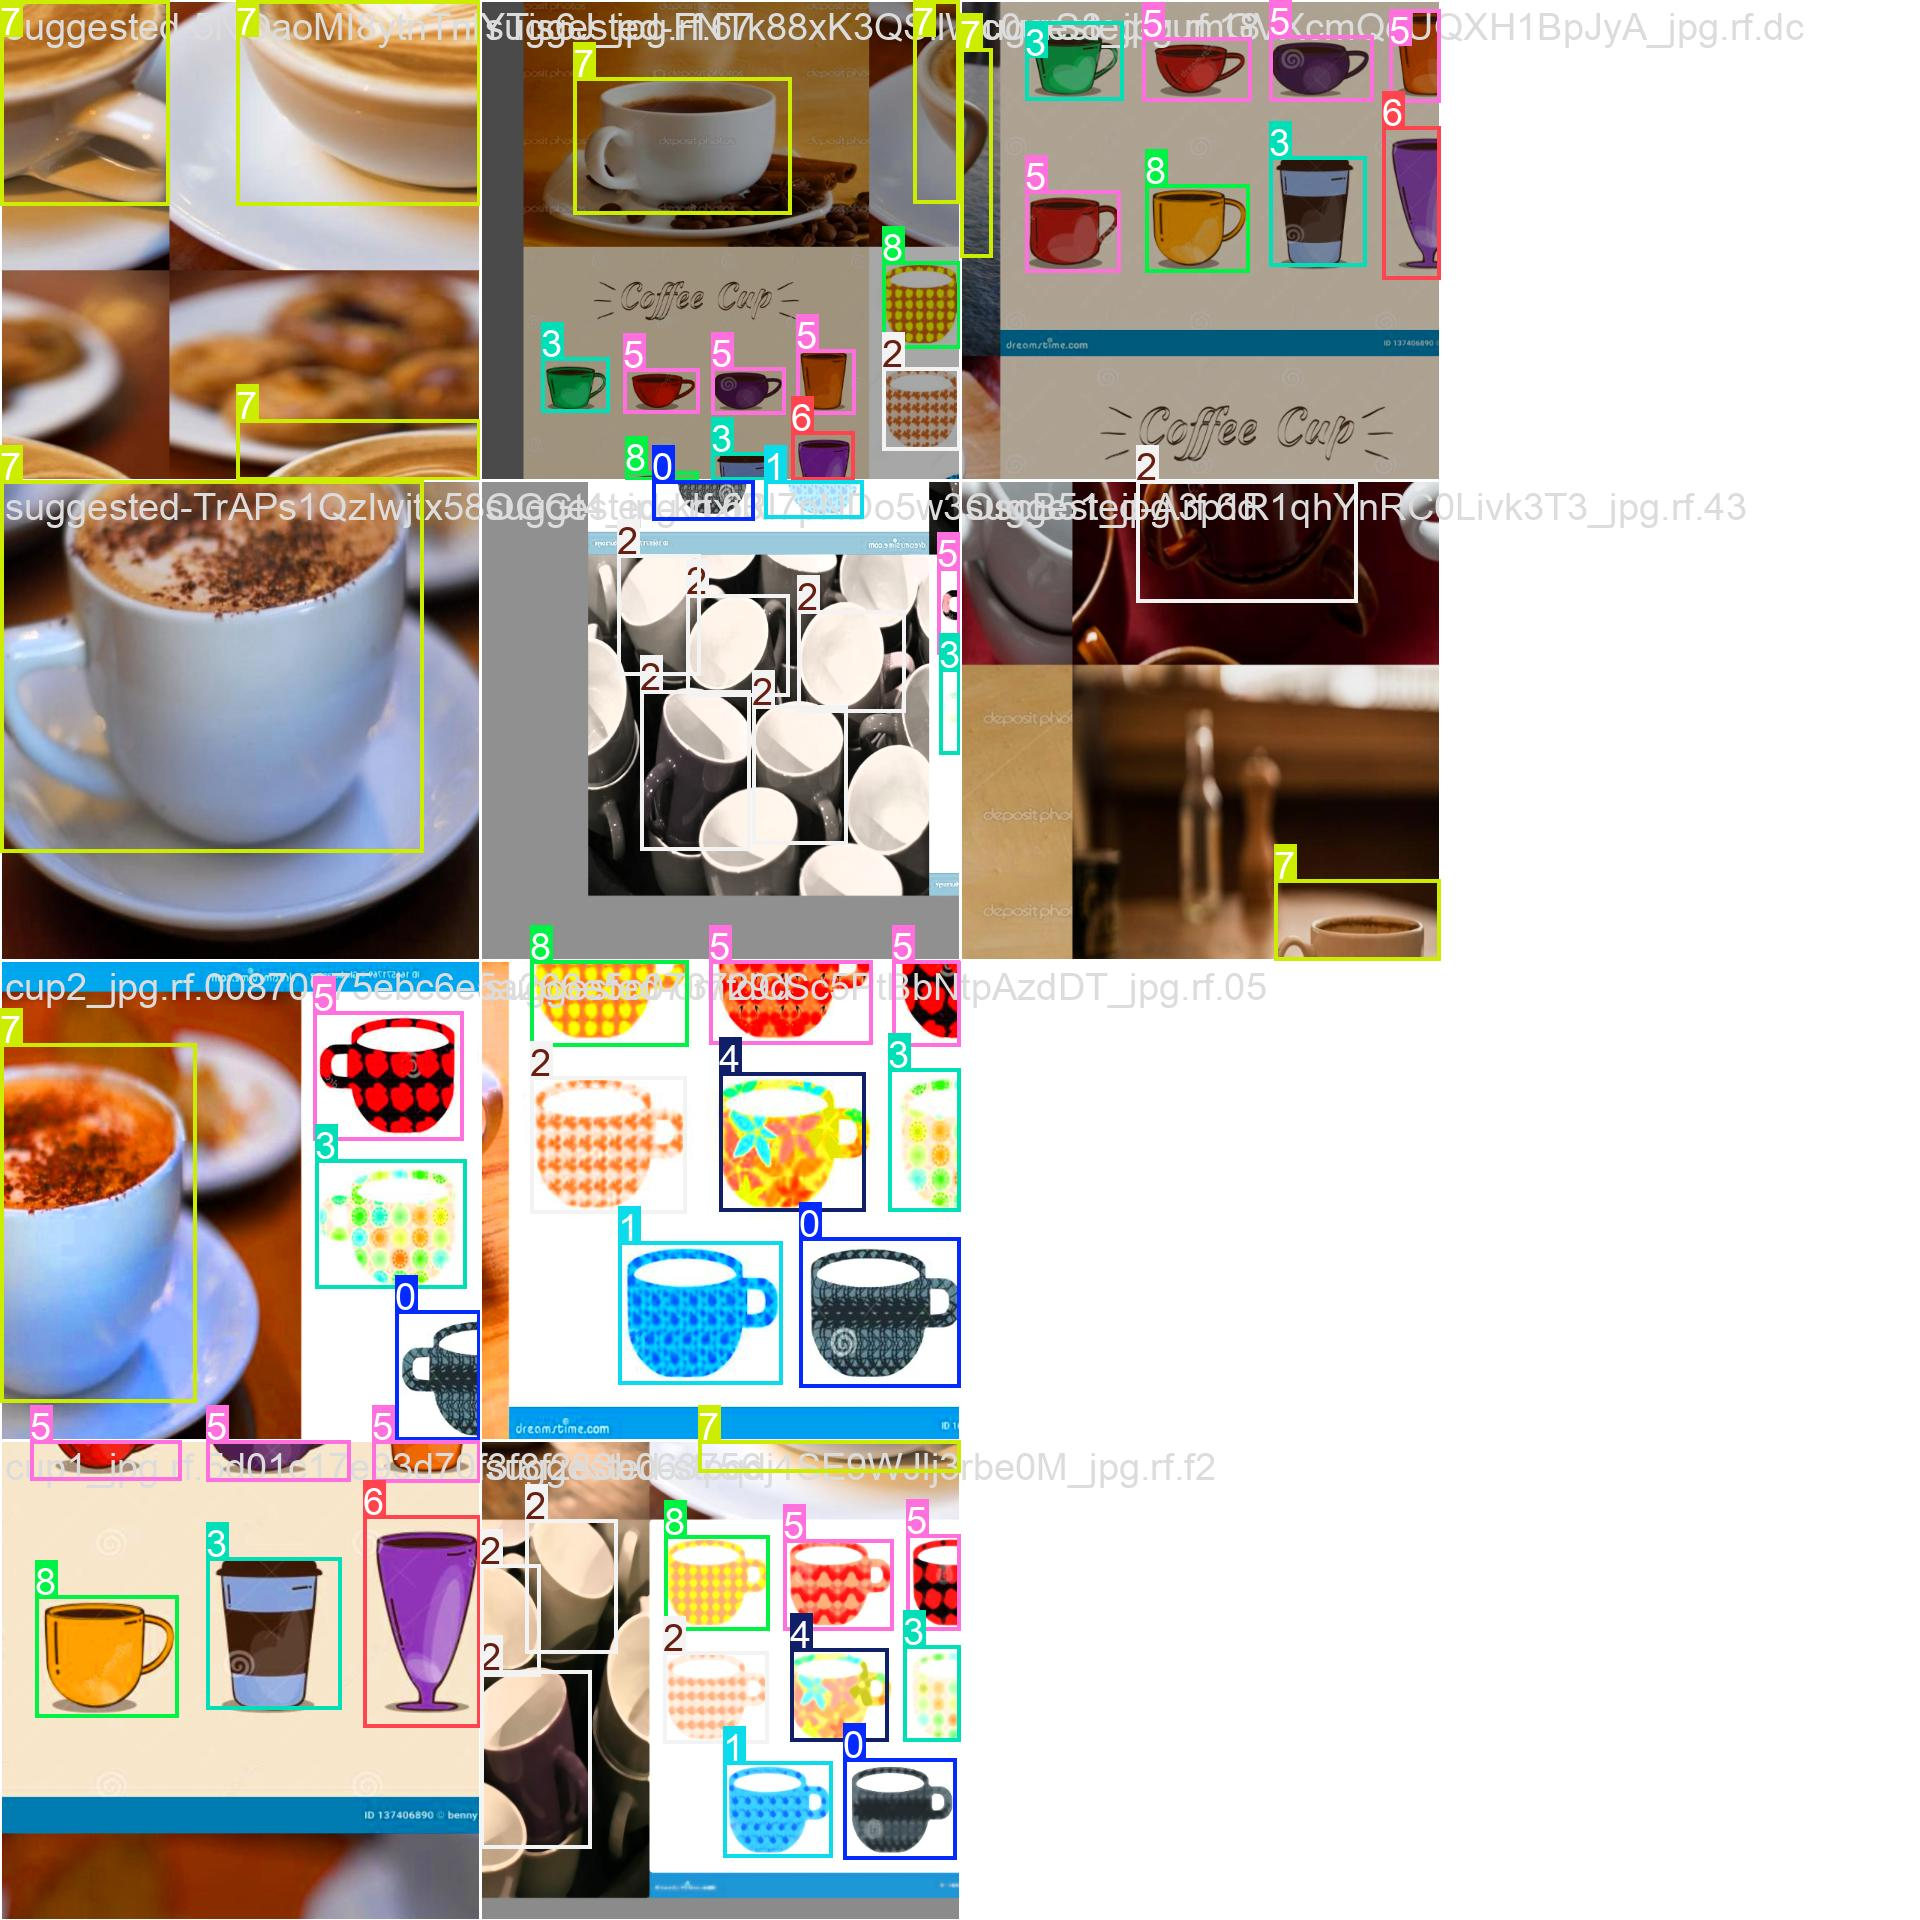

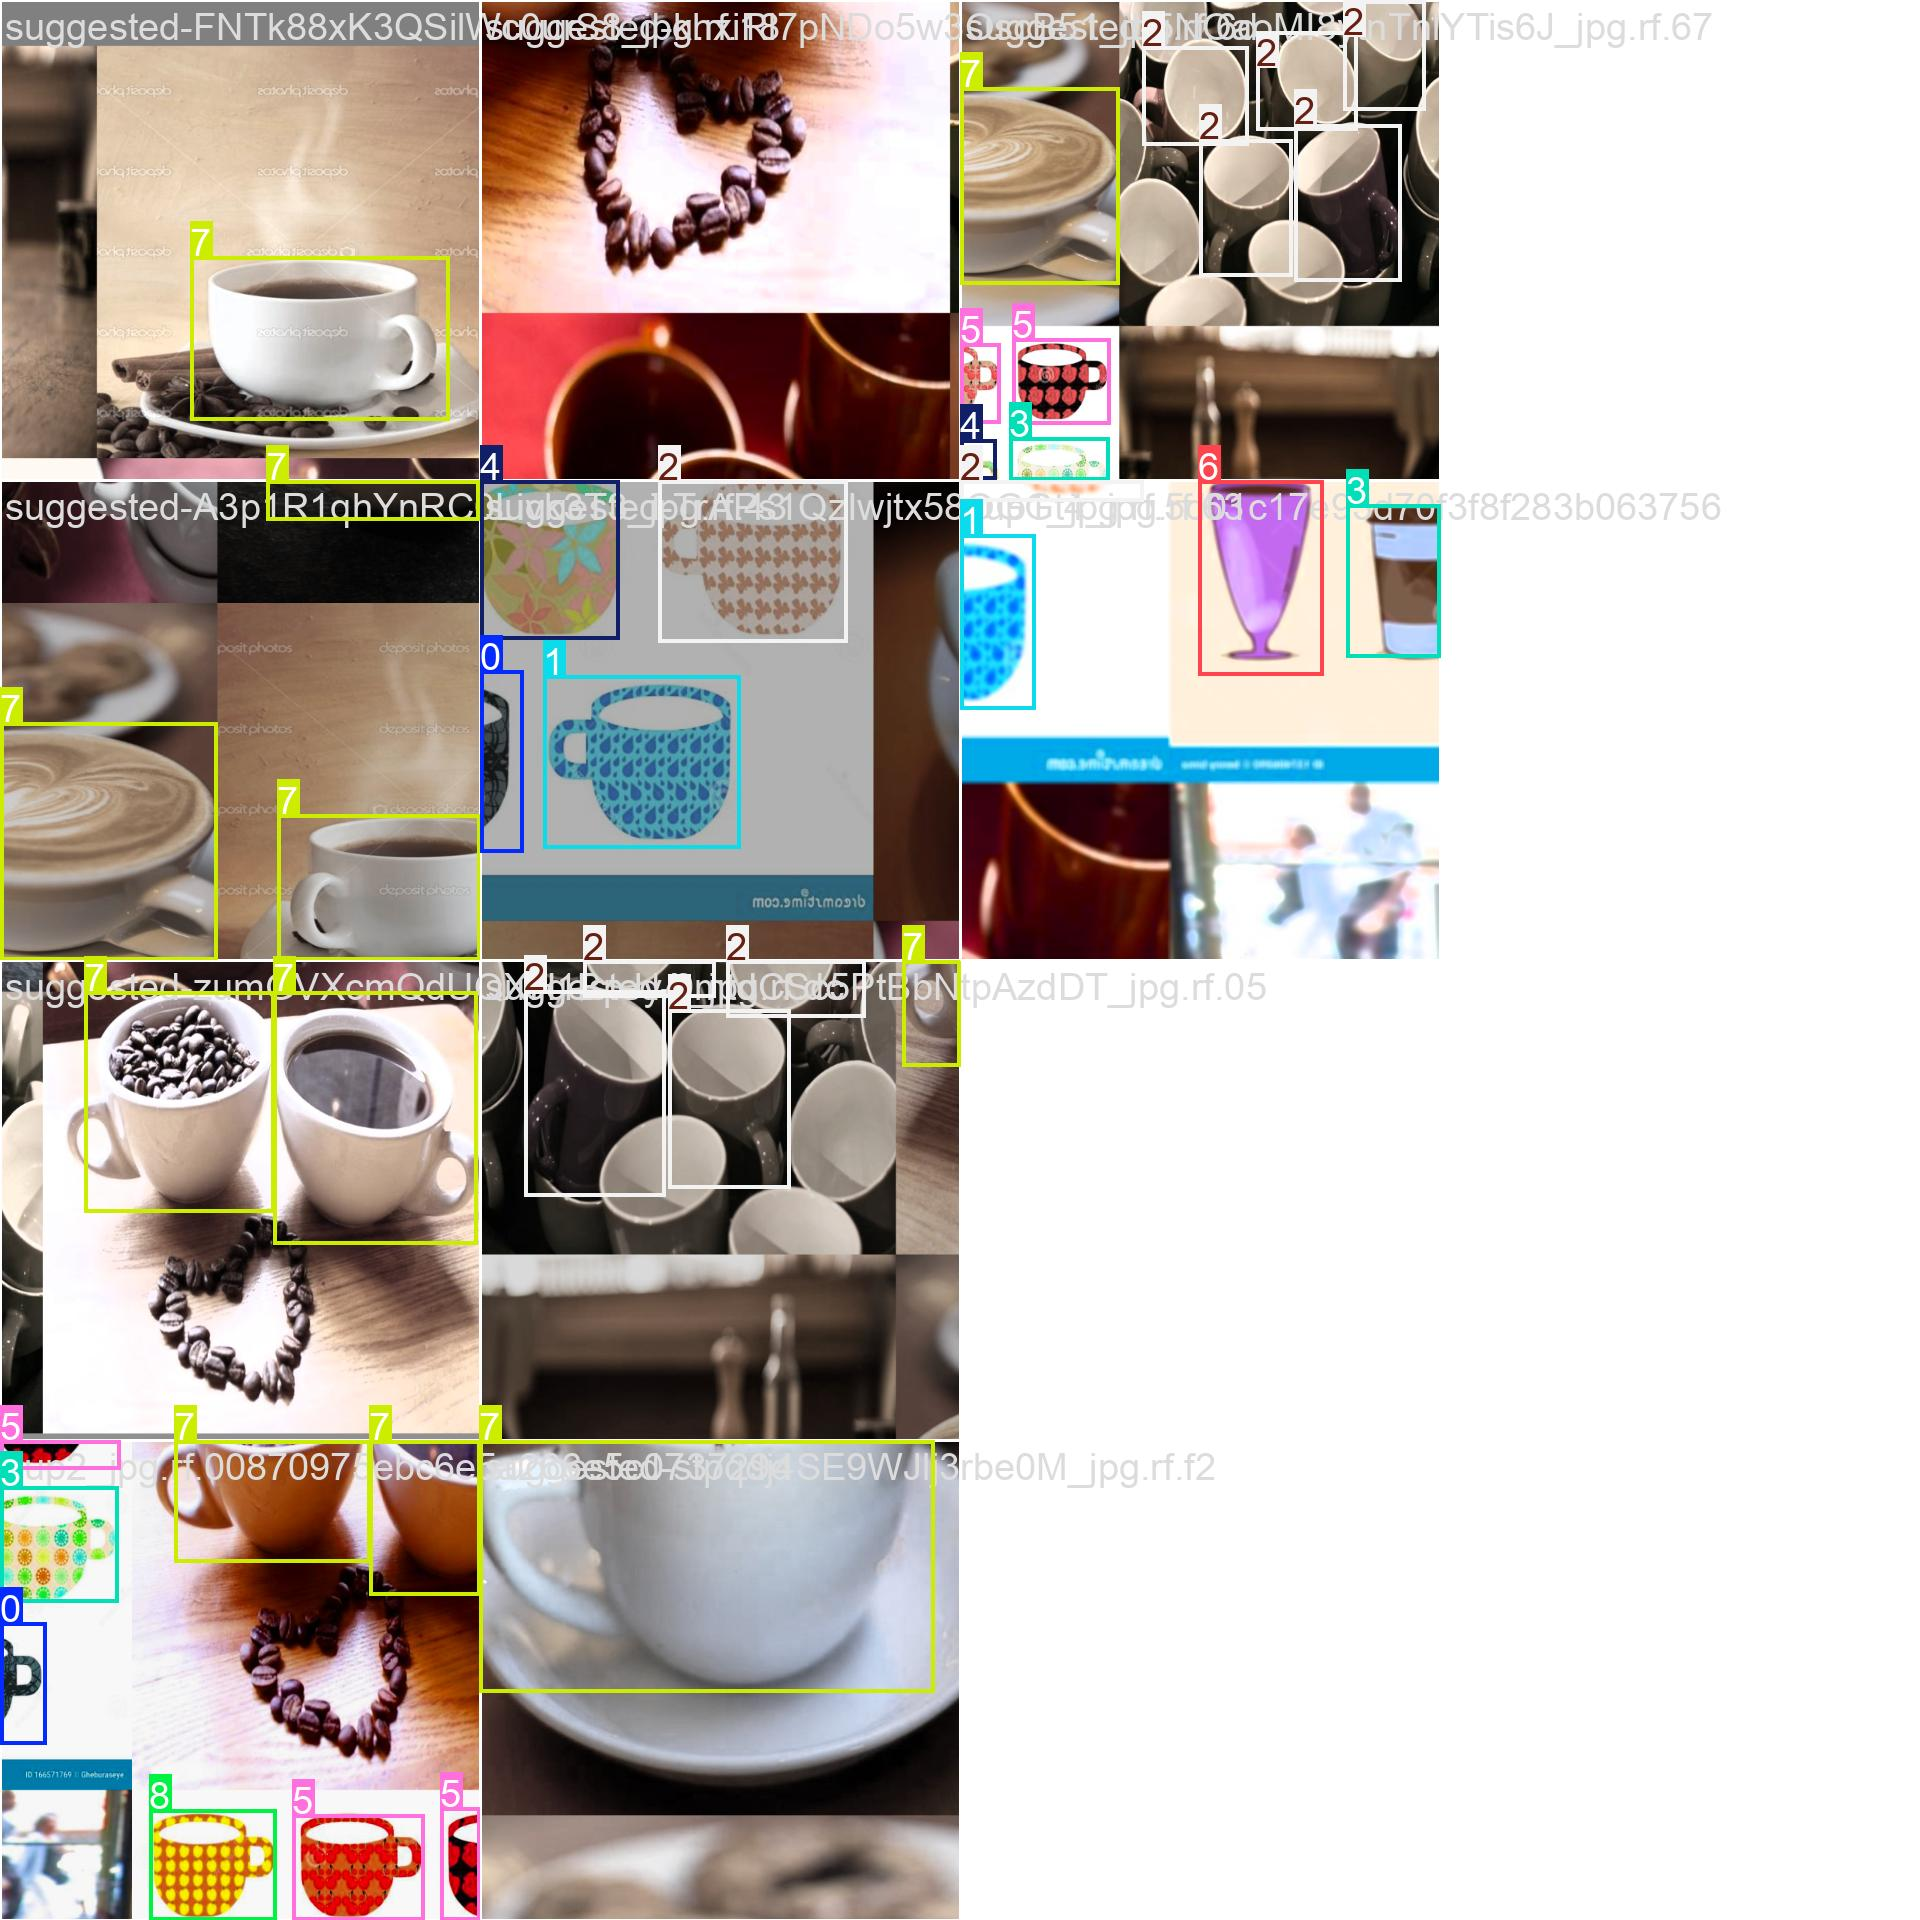

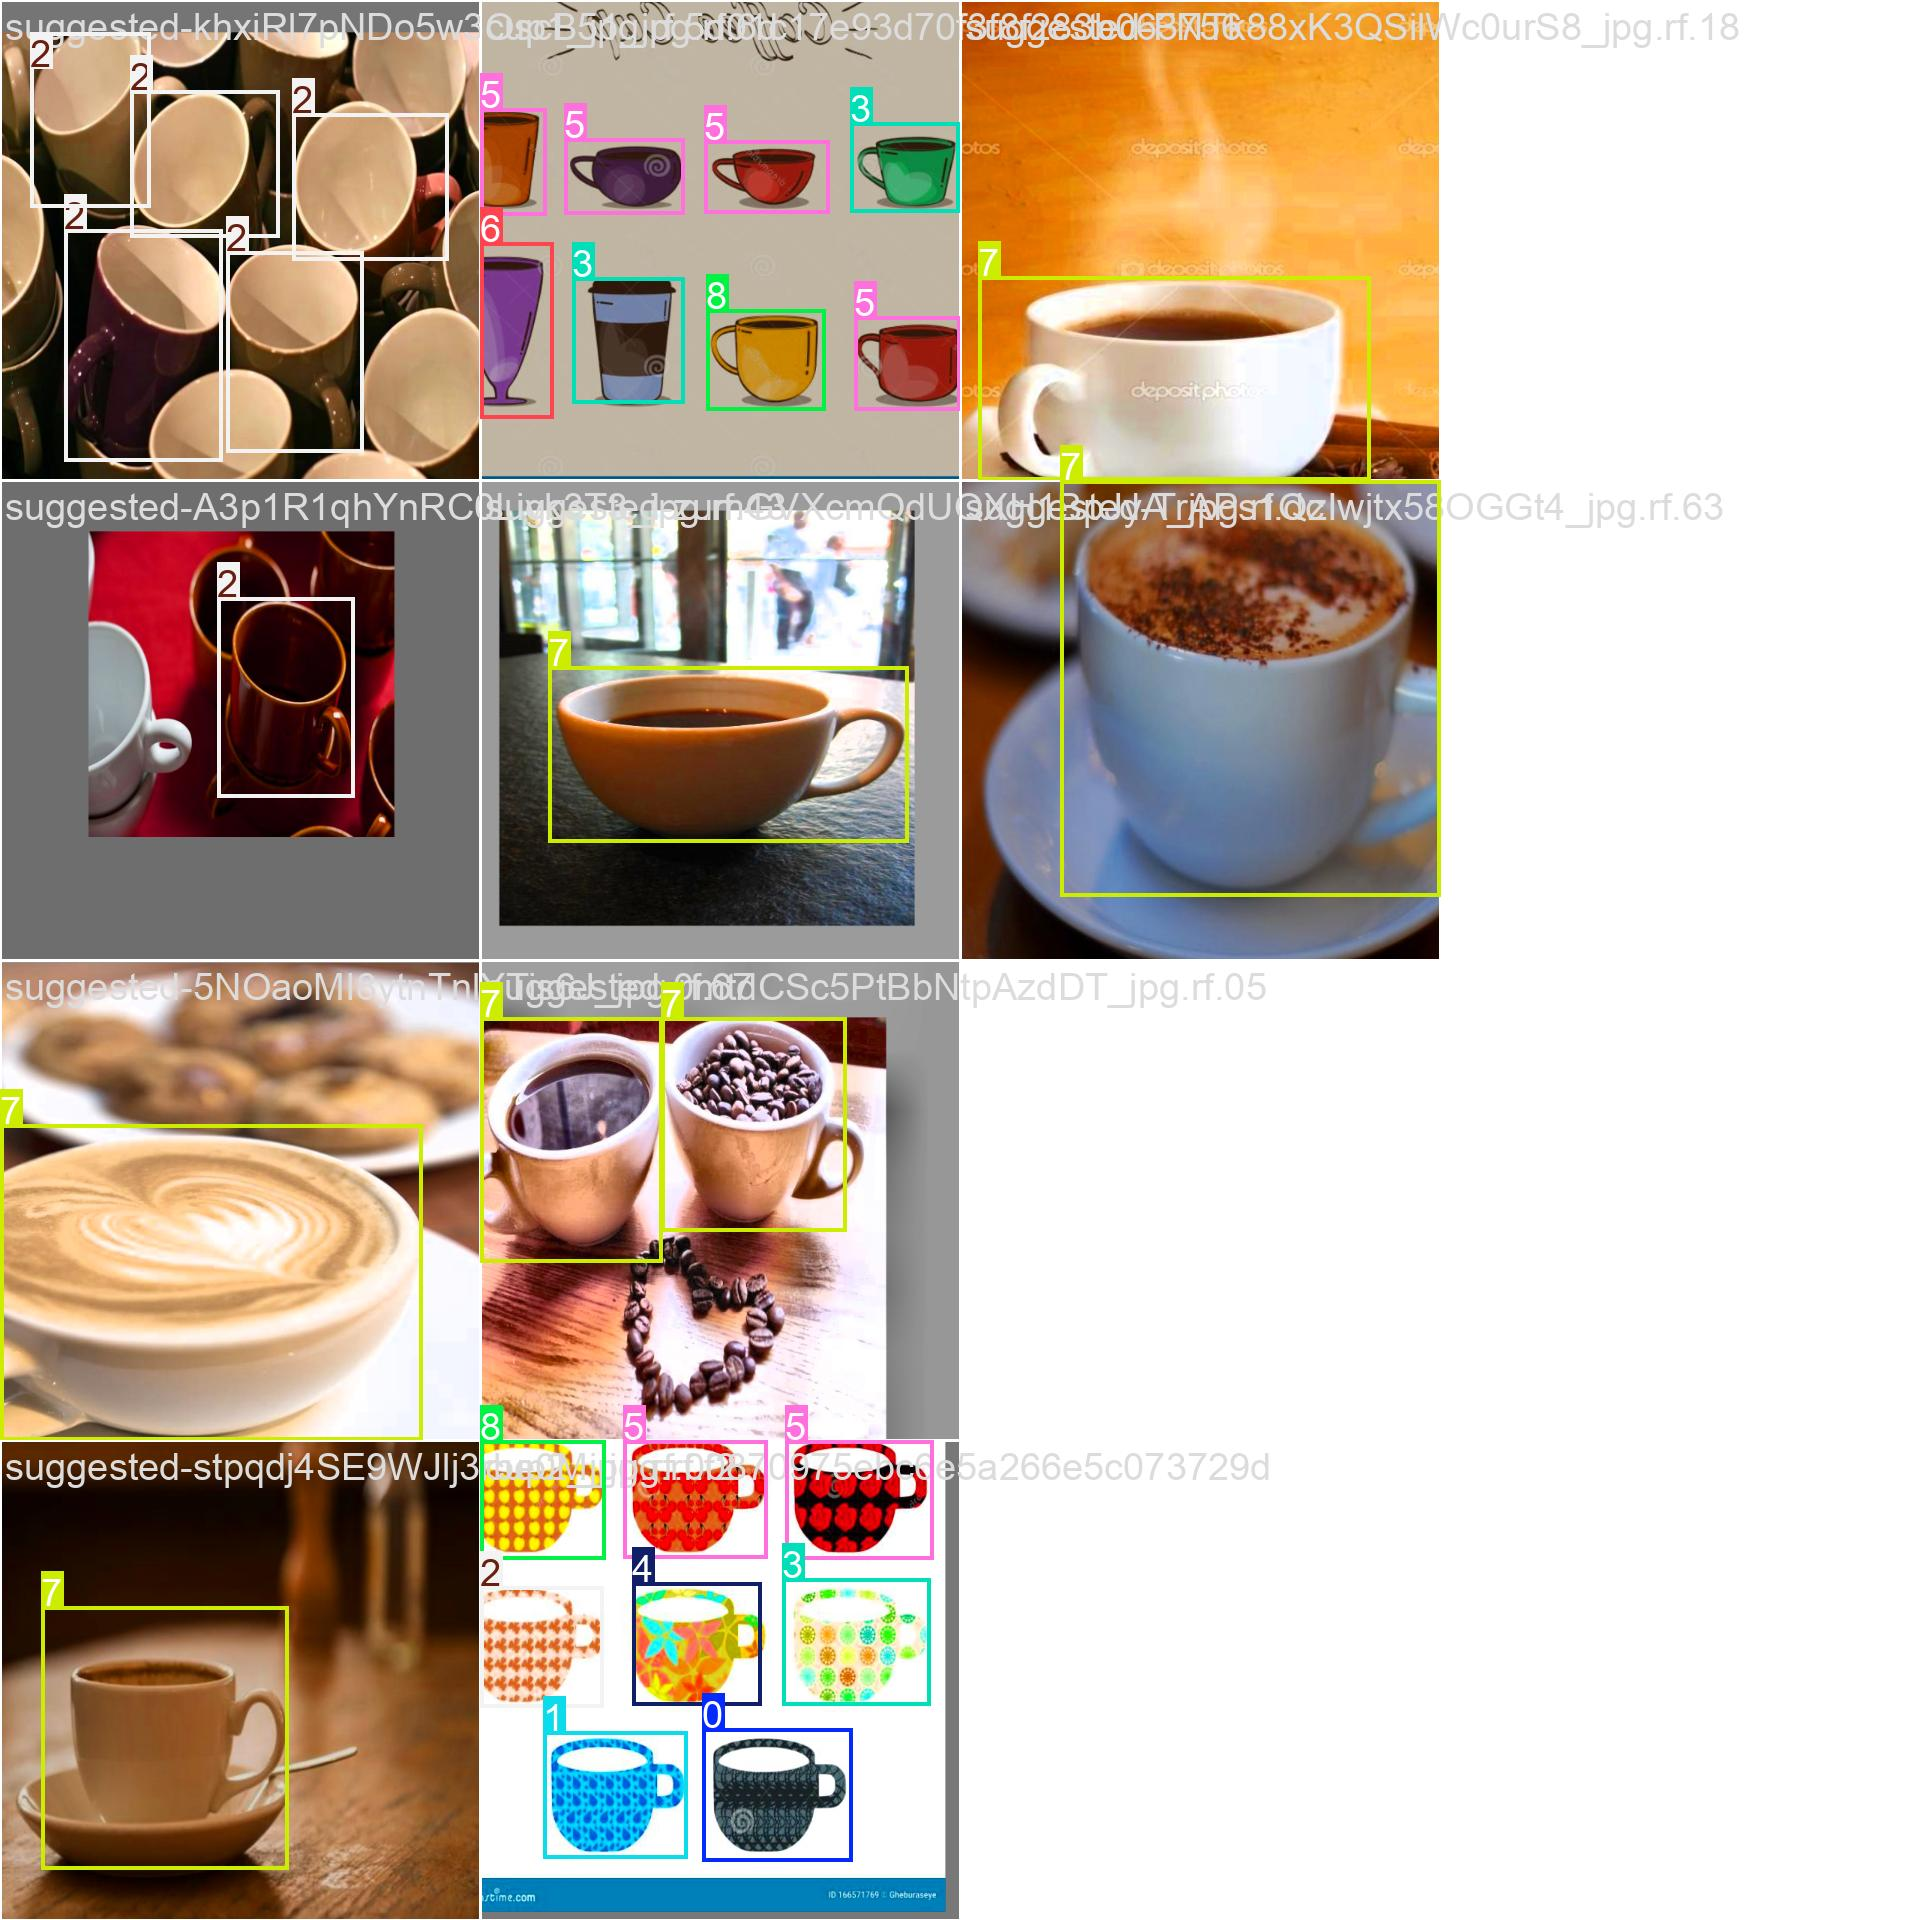

In [28]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('/content/runs/detect/train4/*.jpg'):
  display(Image(filename=image_path, height=600))
  print("\n")